# Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Import the dataset

In [2]:
data = pd.read_csv("vaccine_pred.csv")

In [3]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
data.shape

(26707, 34)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


# check for null values

In [7]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# univariate analysis for numerical columns

In [8]:
num_features = data.select_dtypes(include=[np.number])

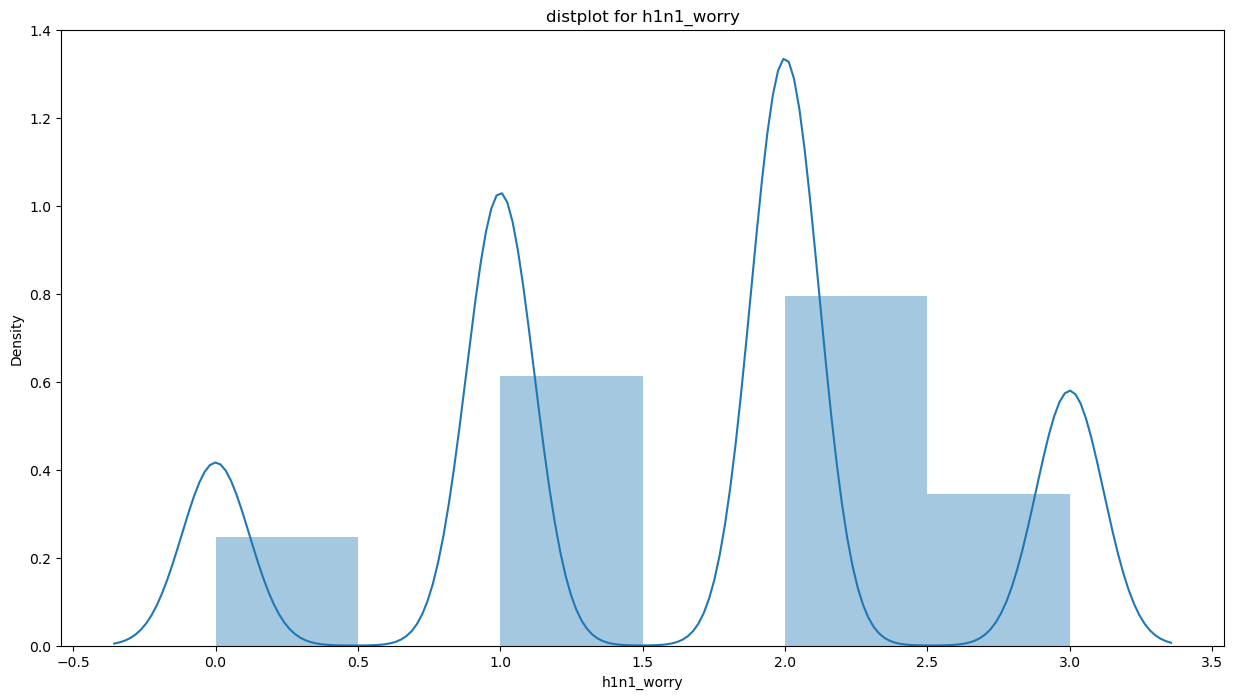

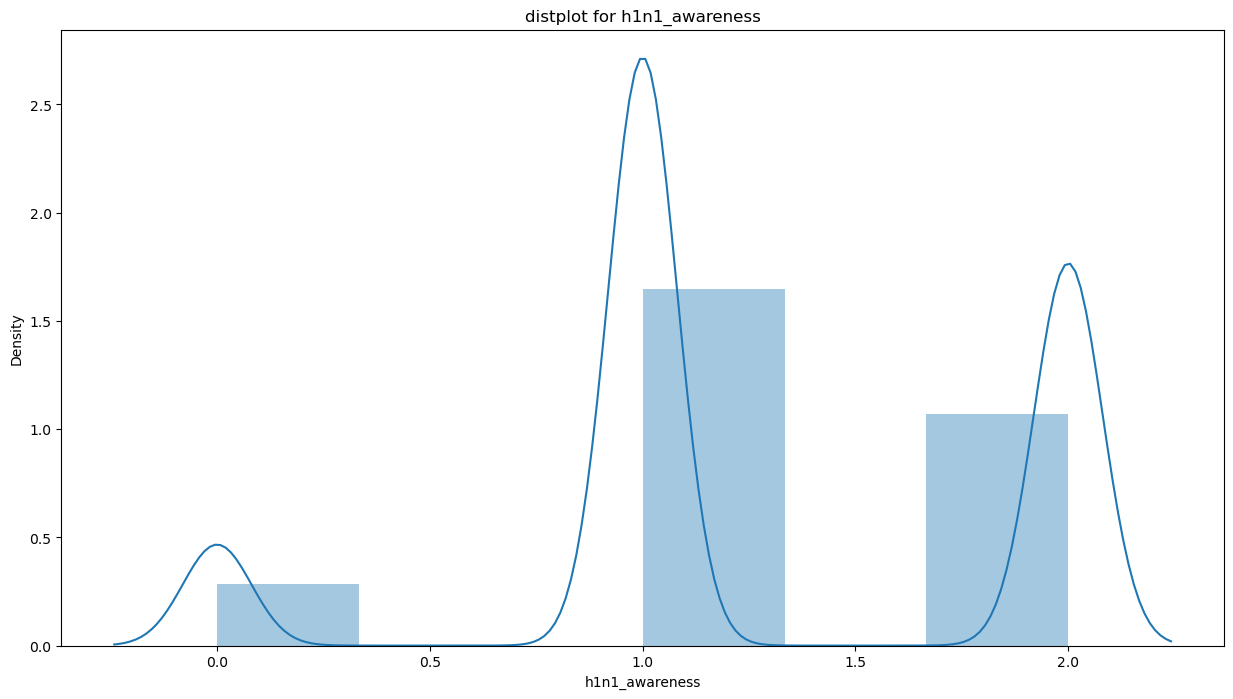

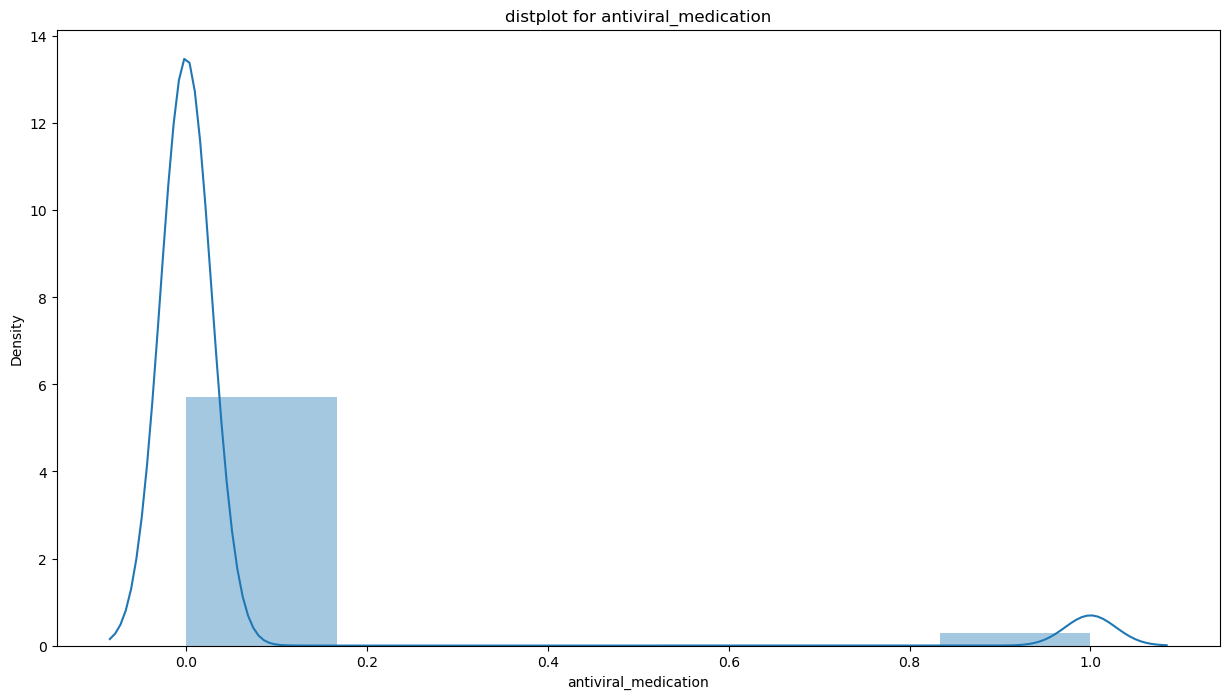

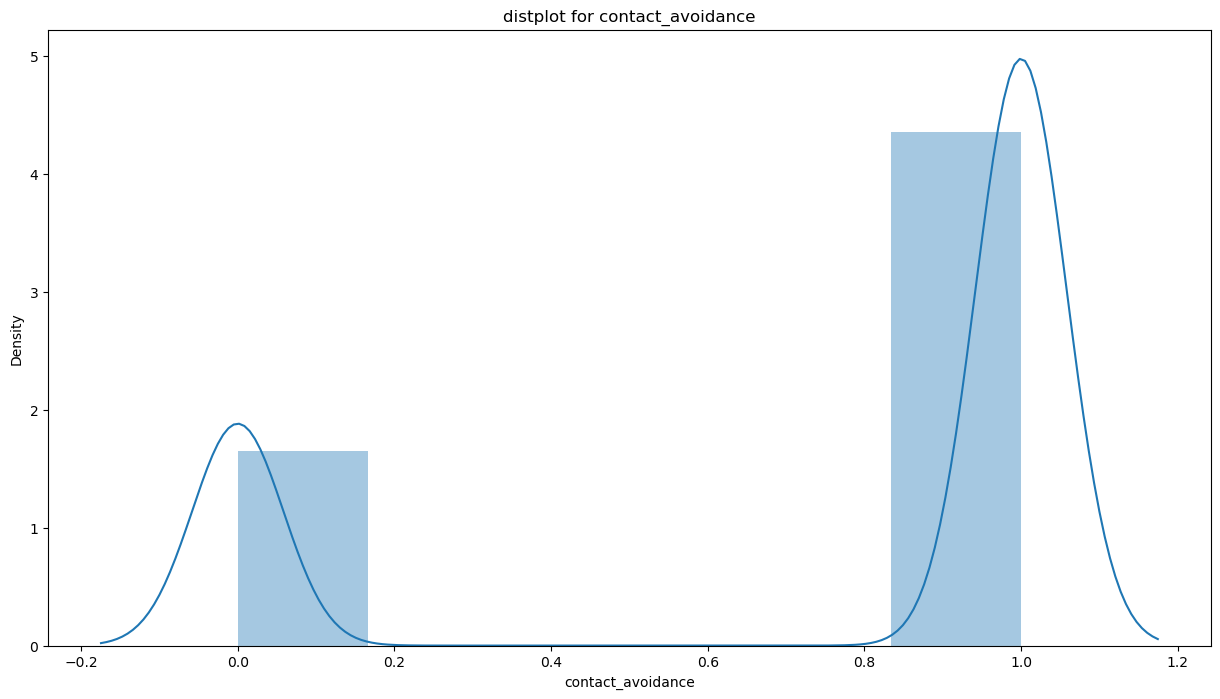

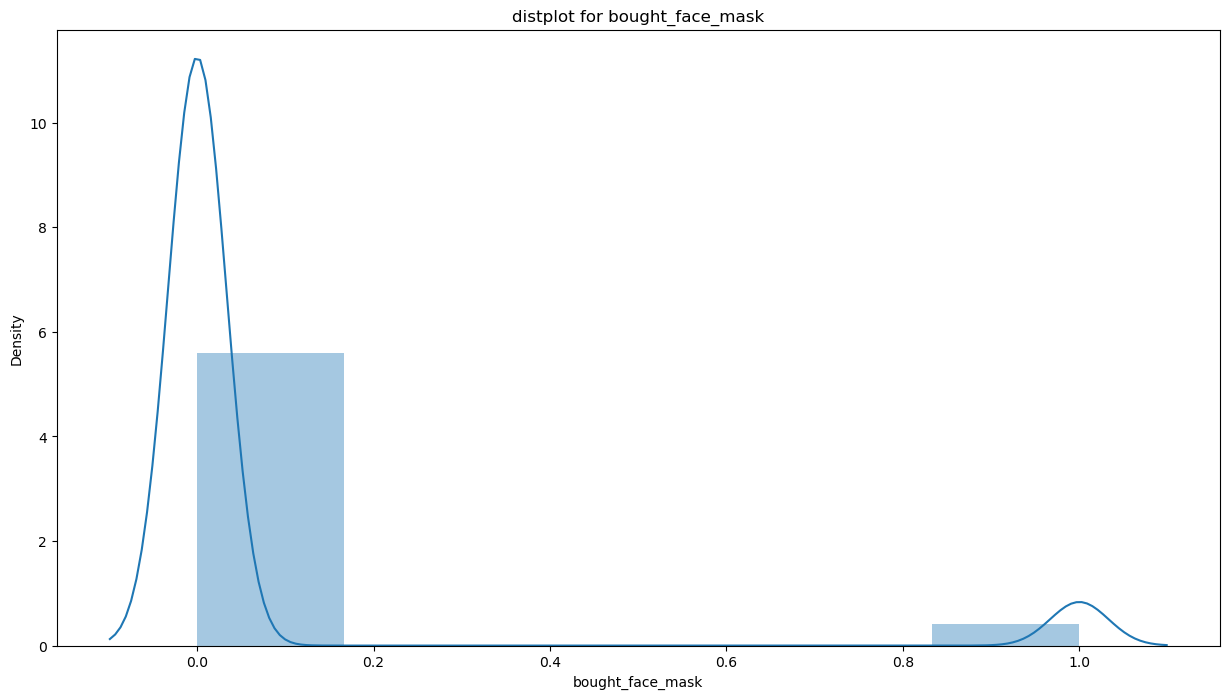

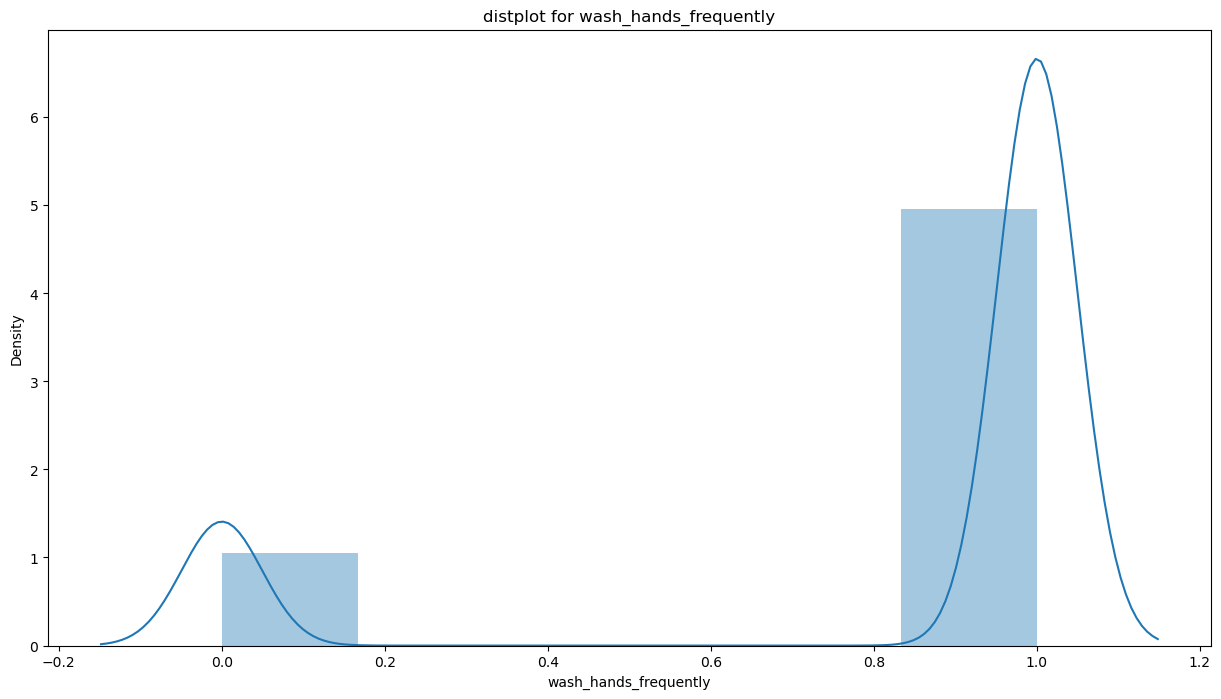

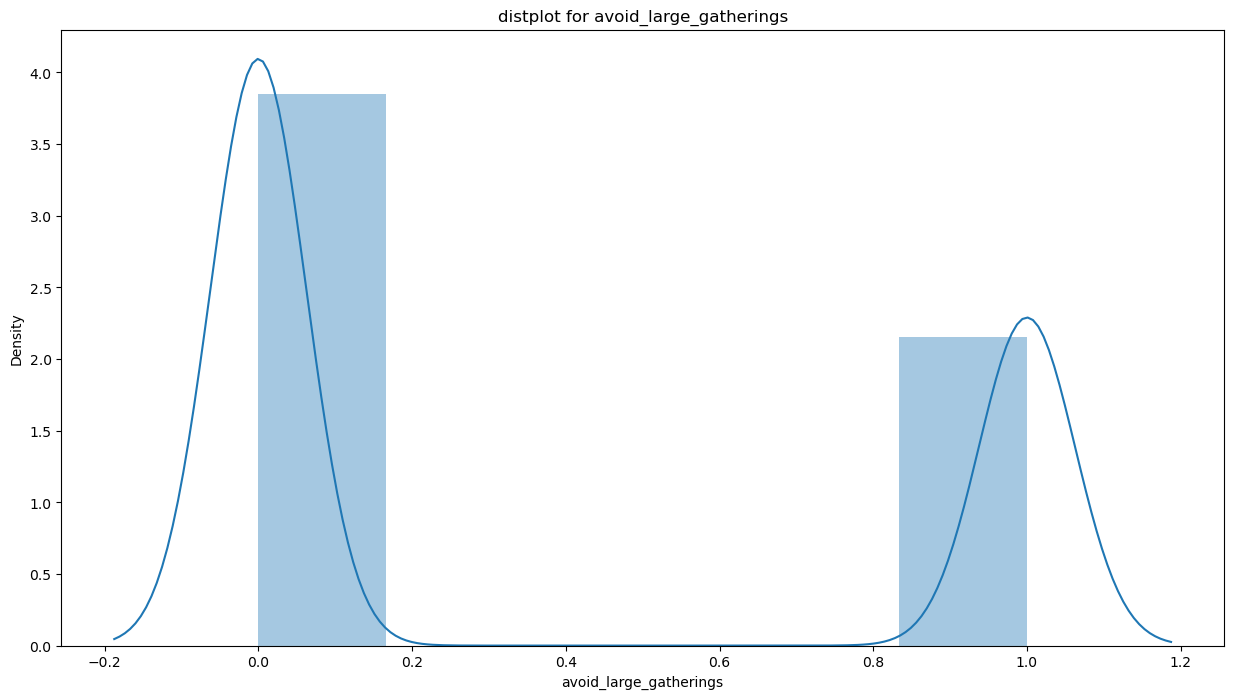

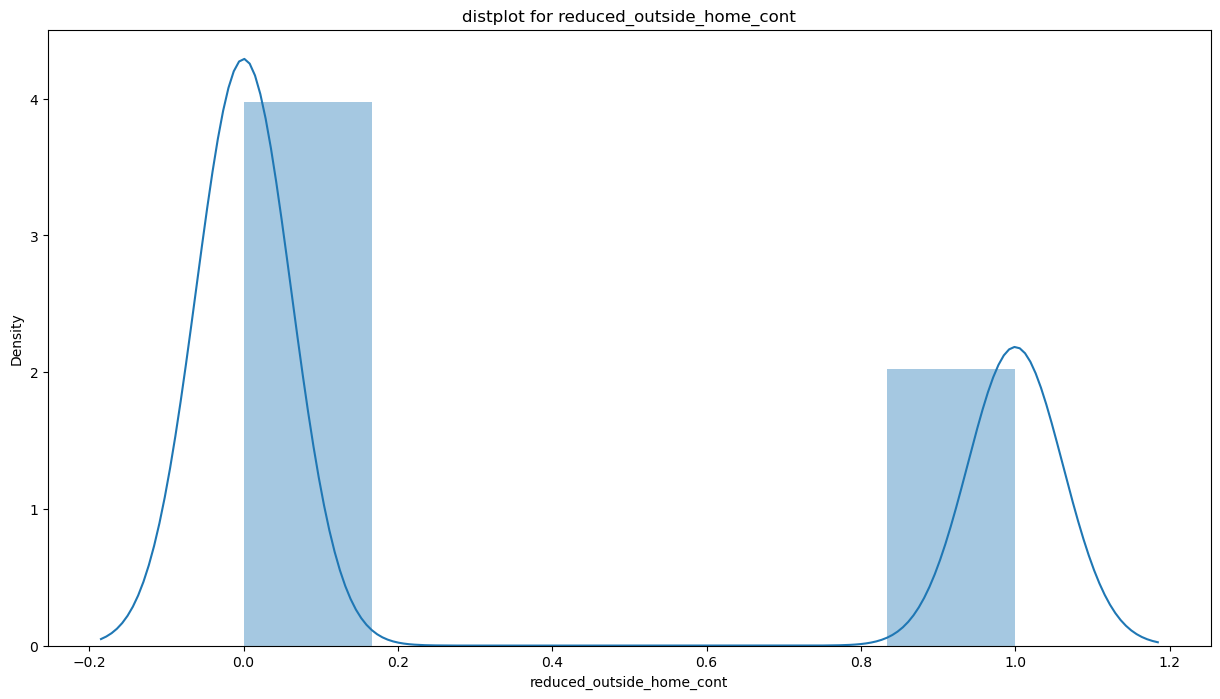

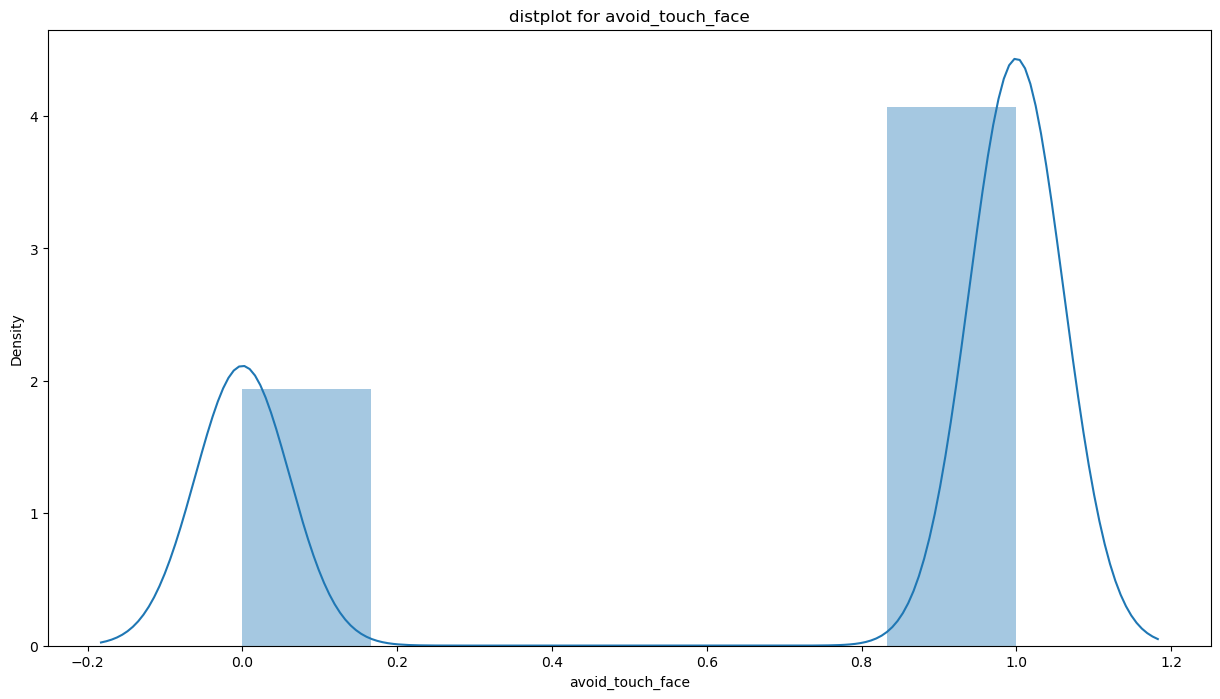

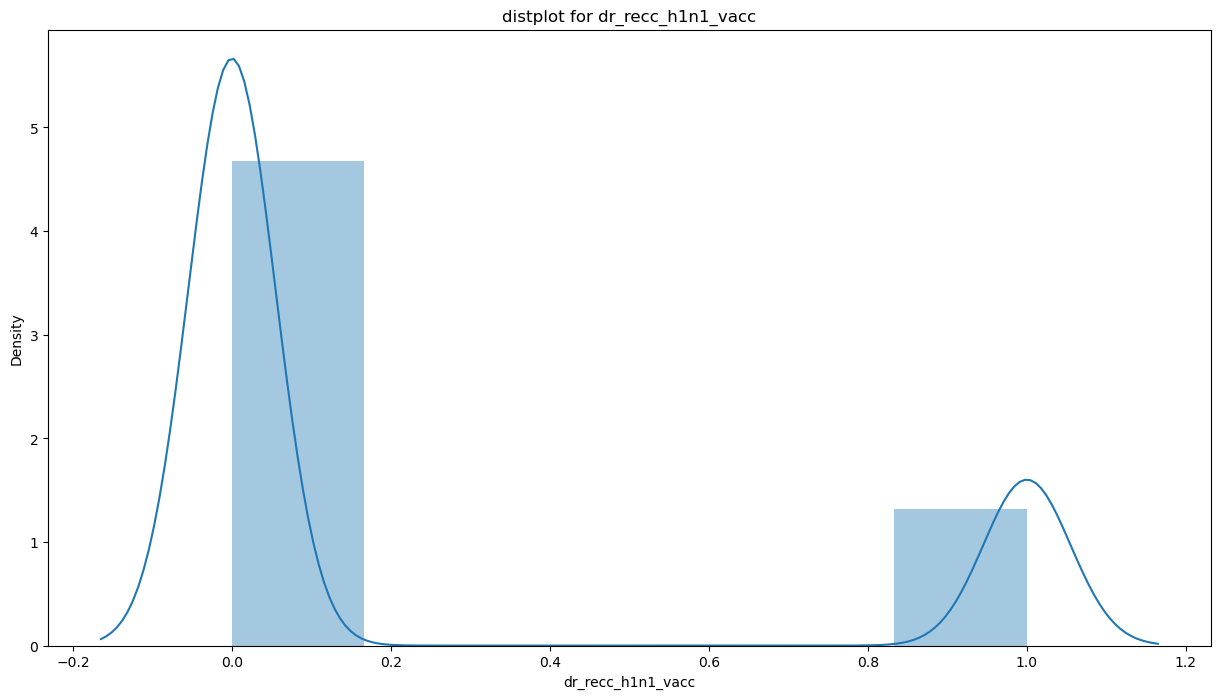

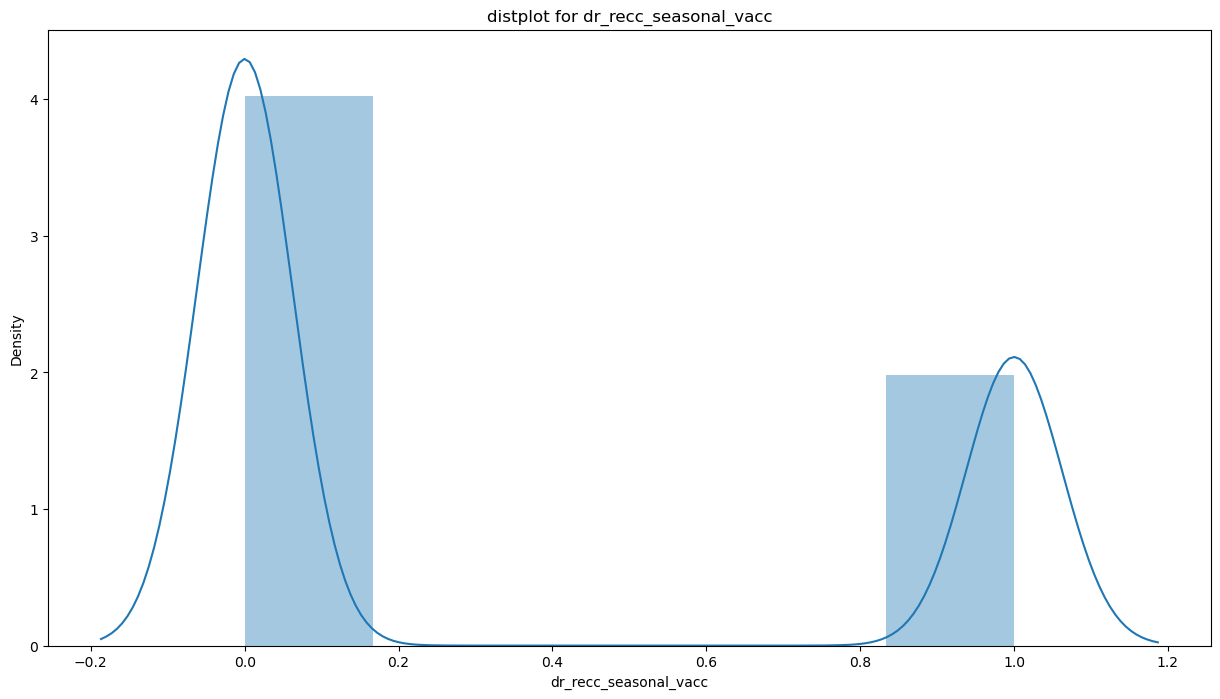

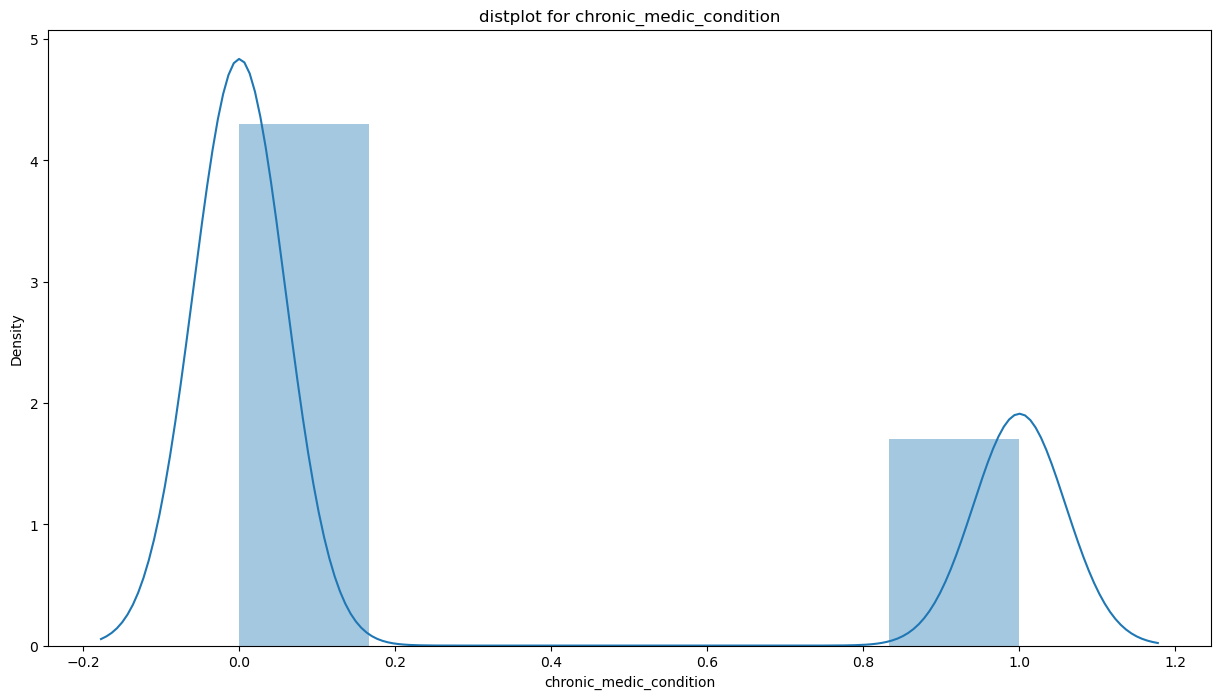

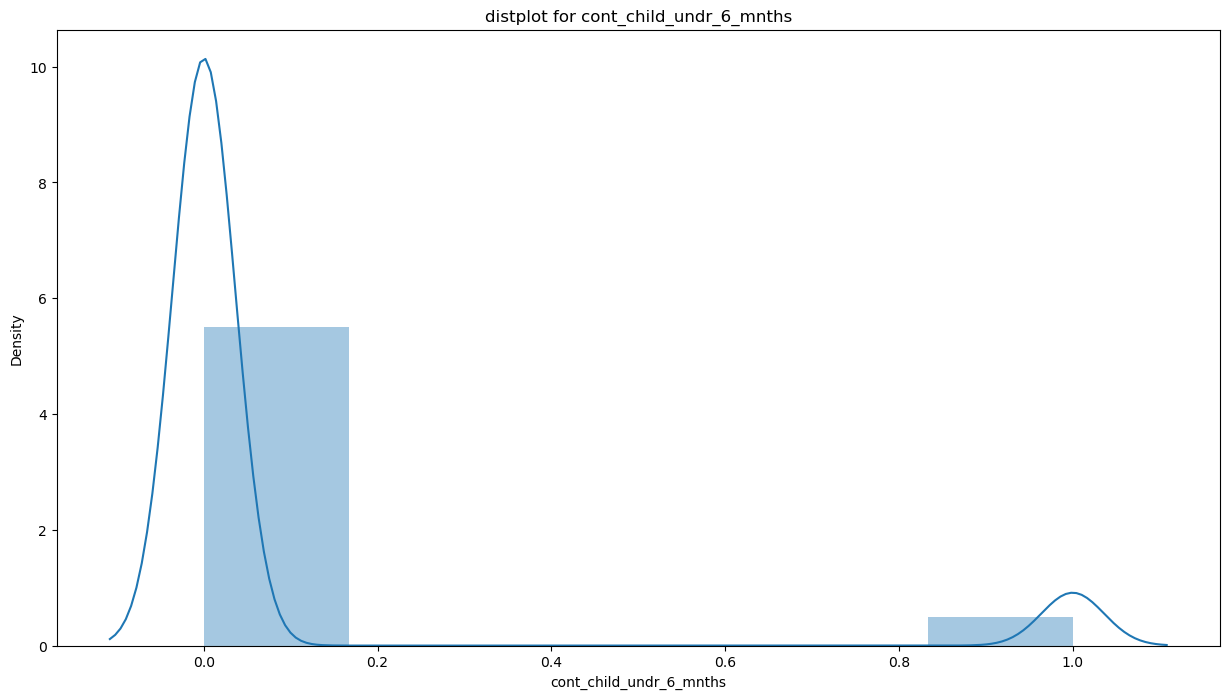

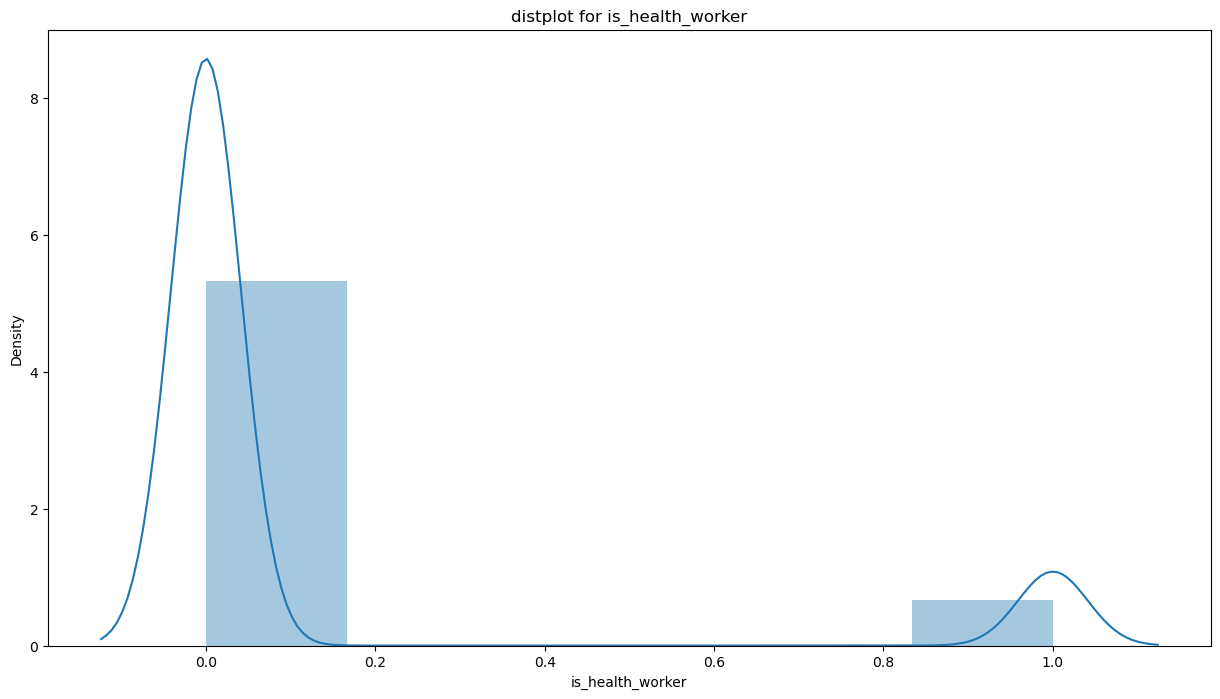

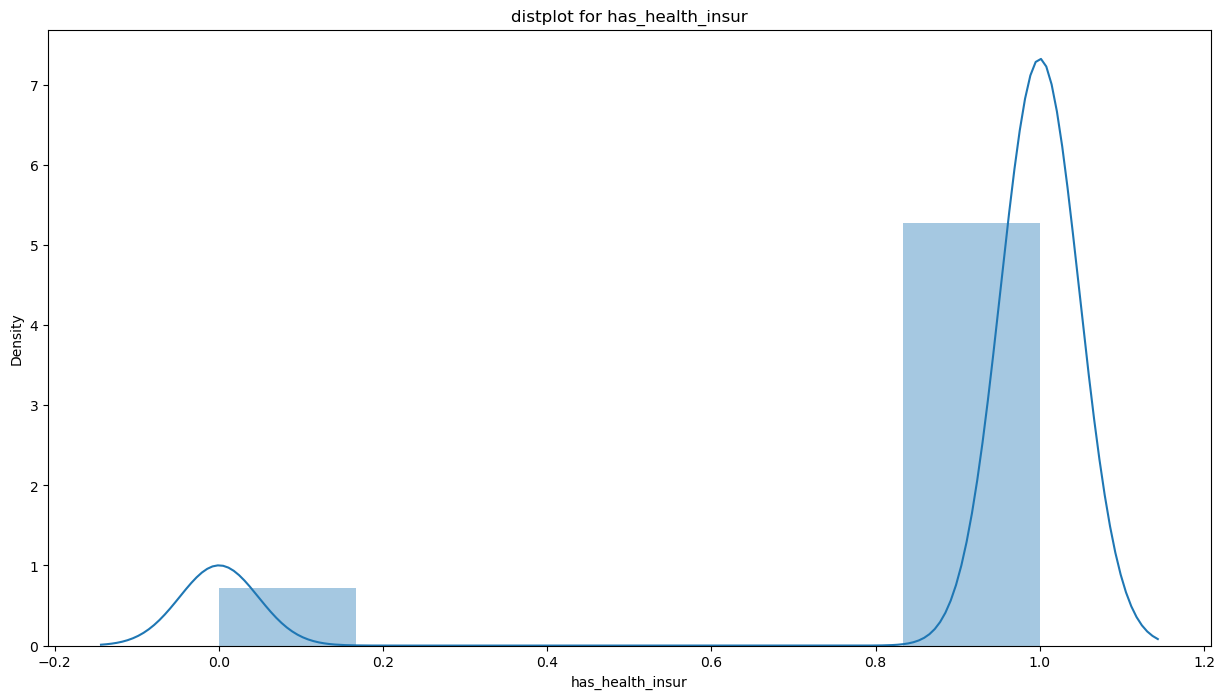

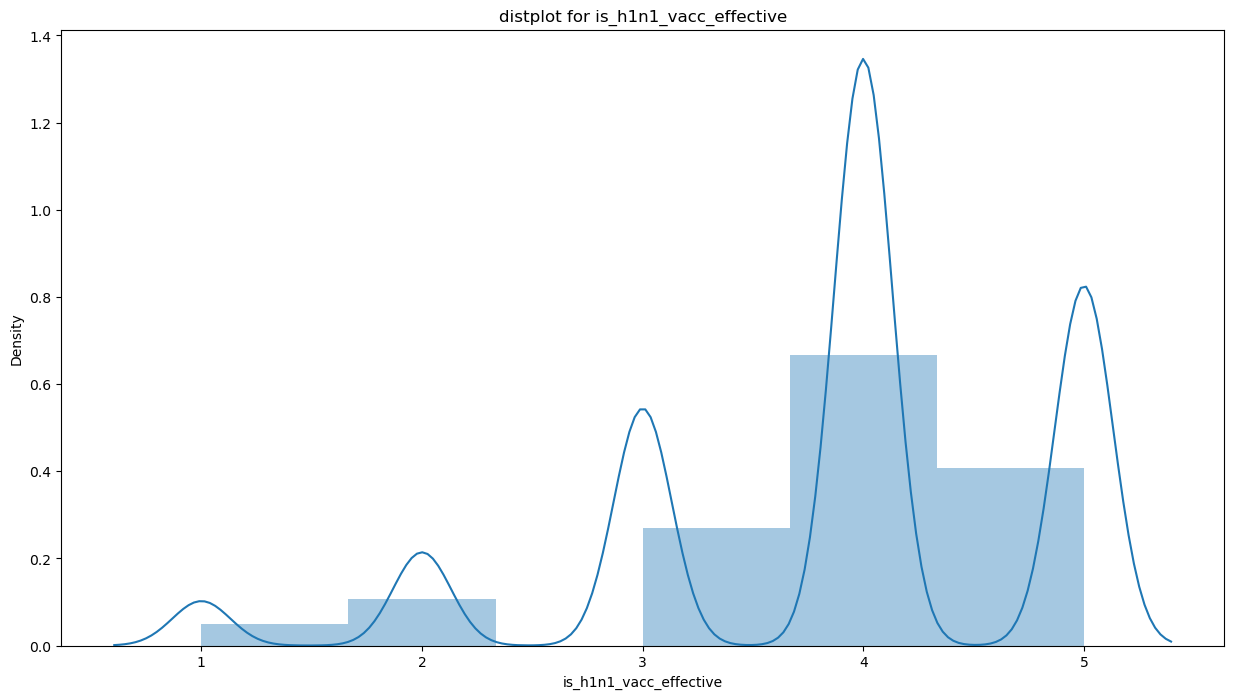

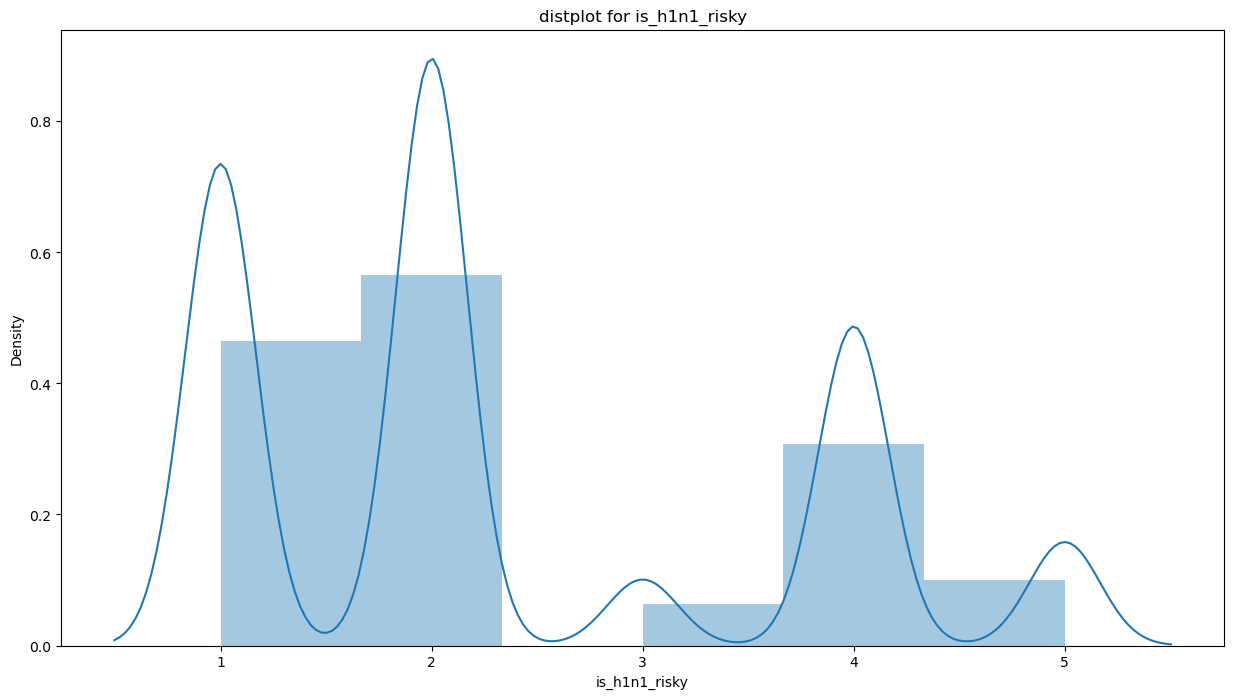

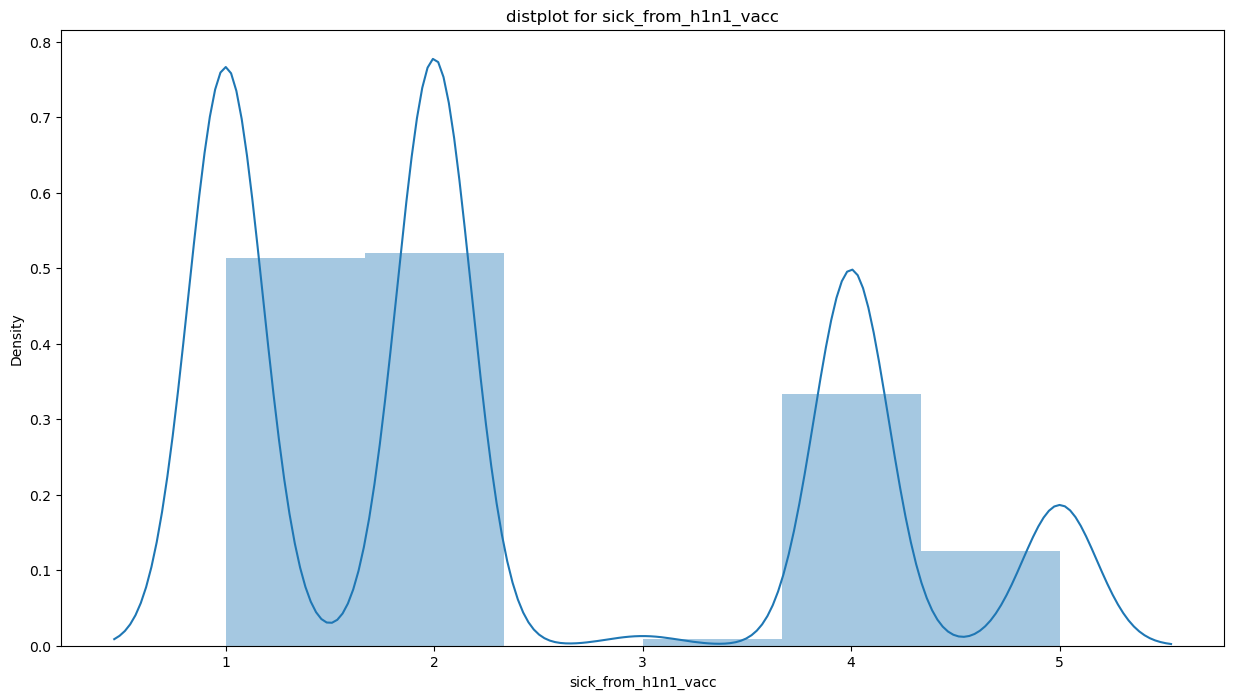

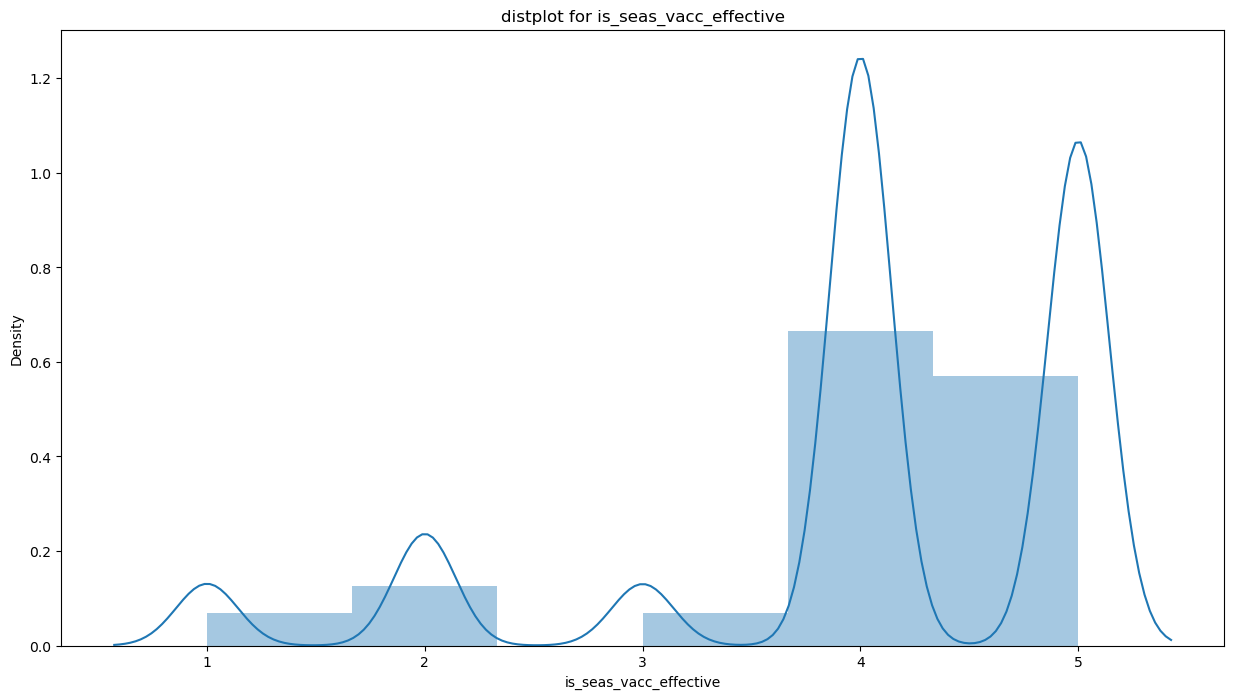

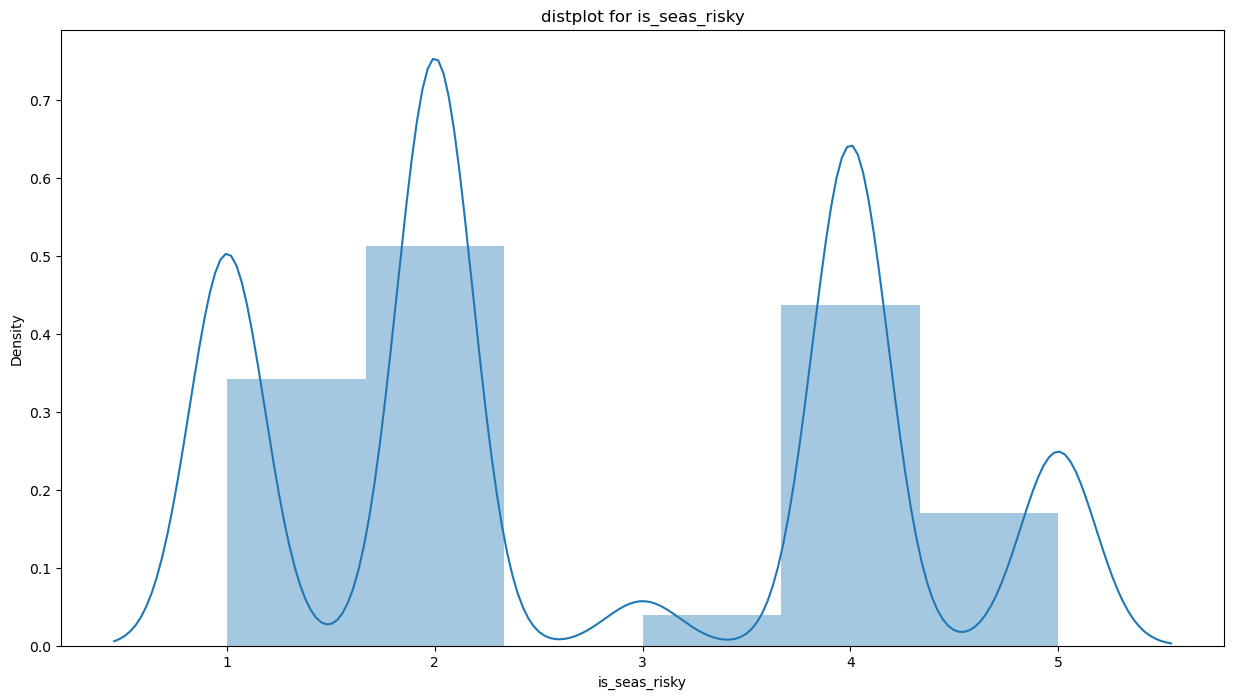

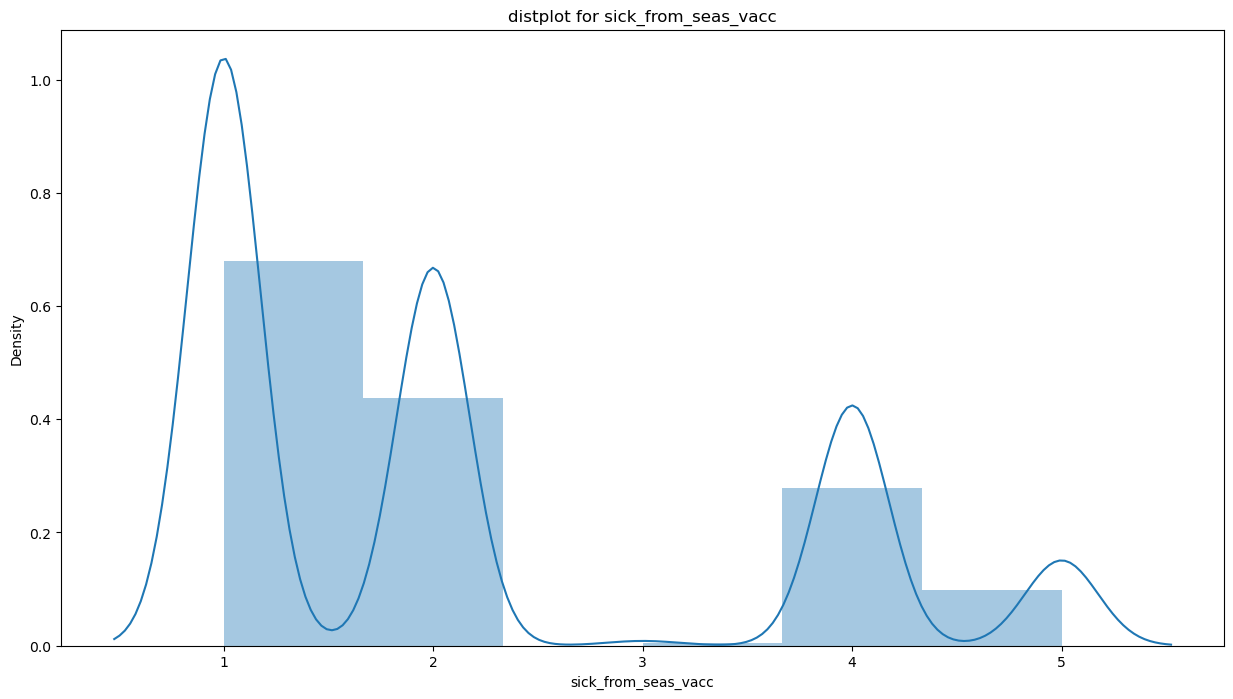

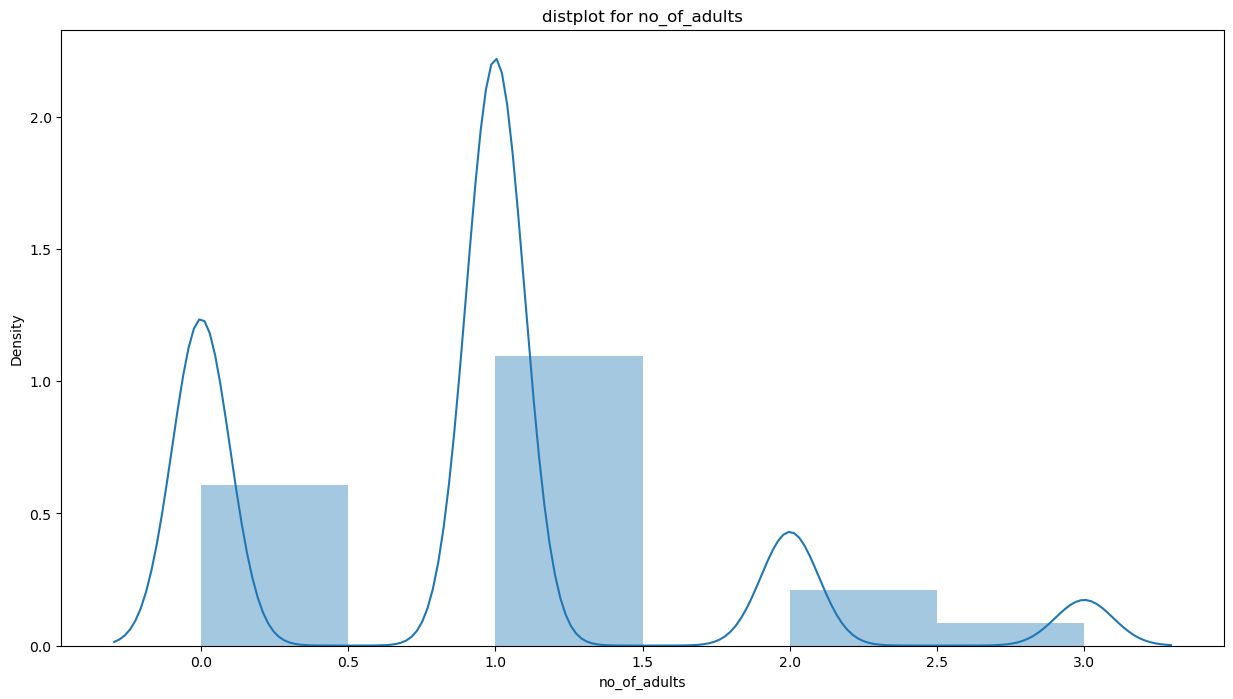

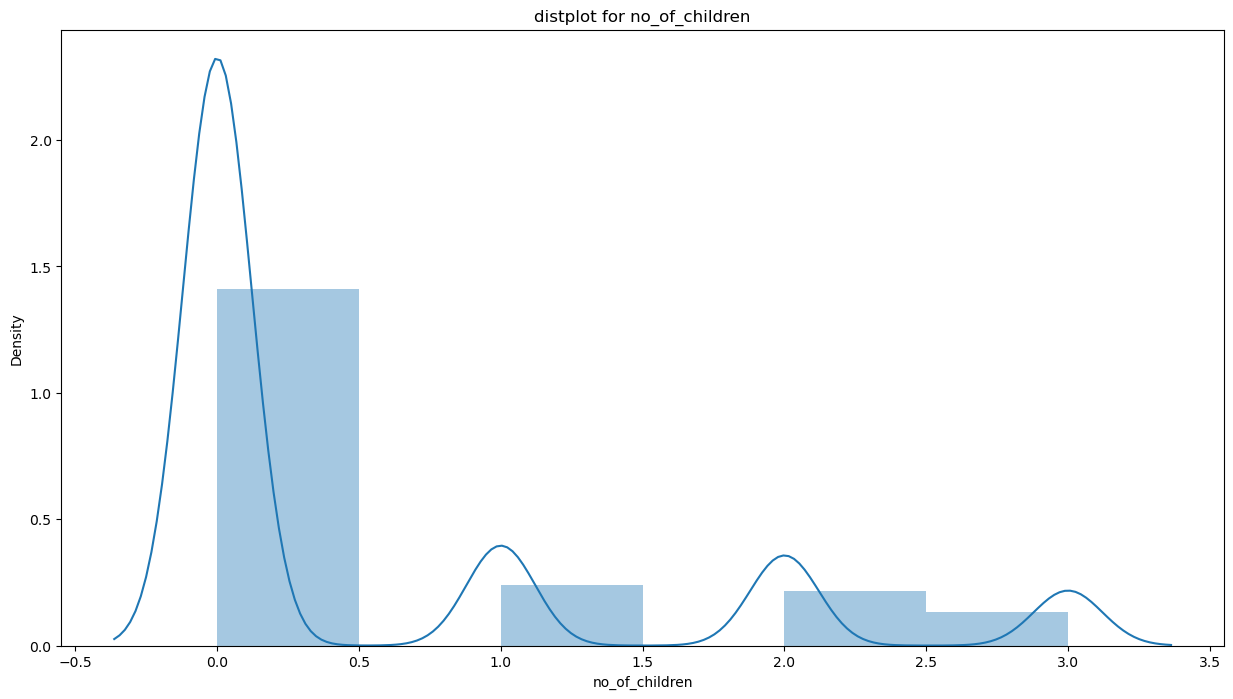

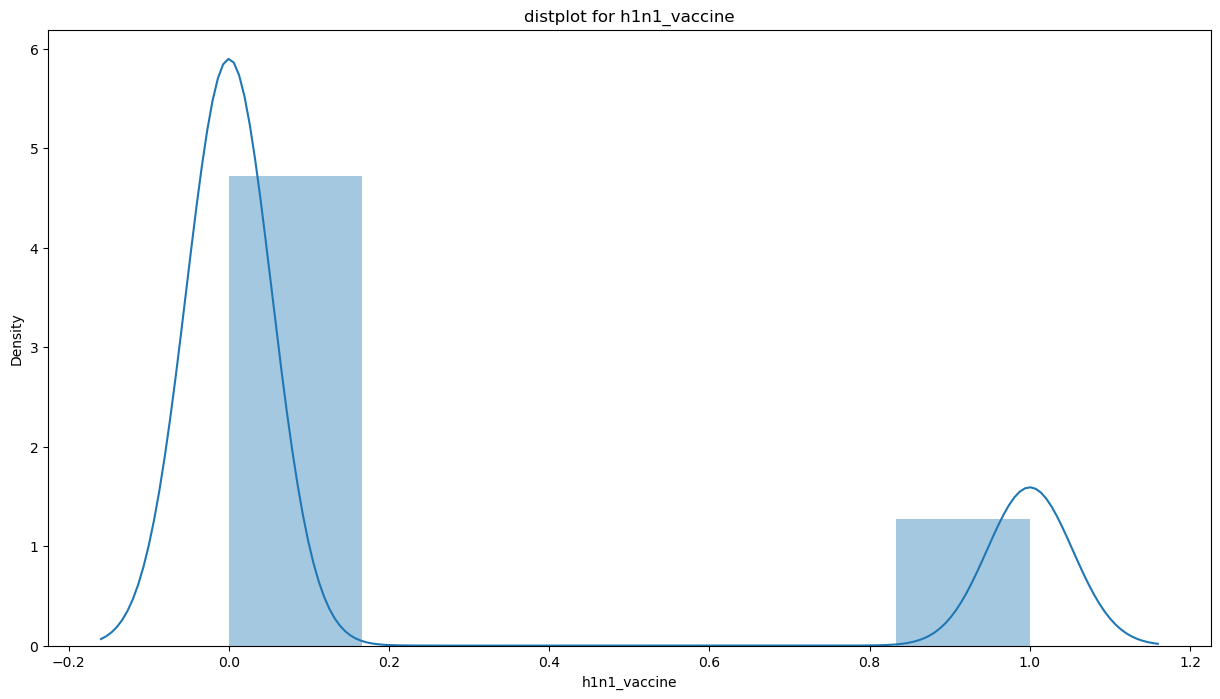

In [9]:
for i in num_features.columns:
    if i!='unique_id':
        plt.figure(figsize=(15,8))
        sns.distplot(num_features[i],kde=True,bins=6)
        plt.title(f"distplot for {i}")
        plt.show()

# univariate analysis for categorical variables

In [10]:
categ_features = data.select_dtypes(include='object')

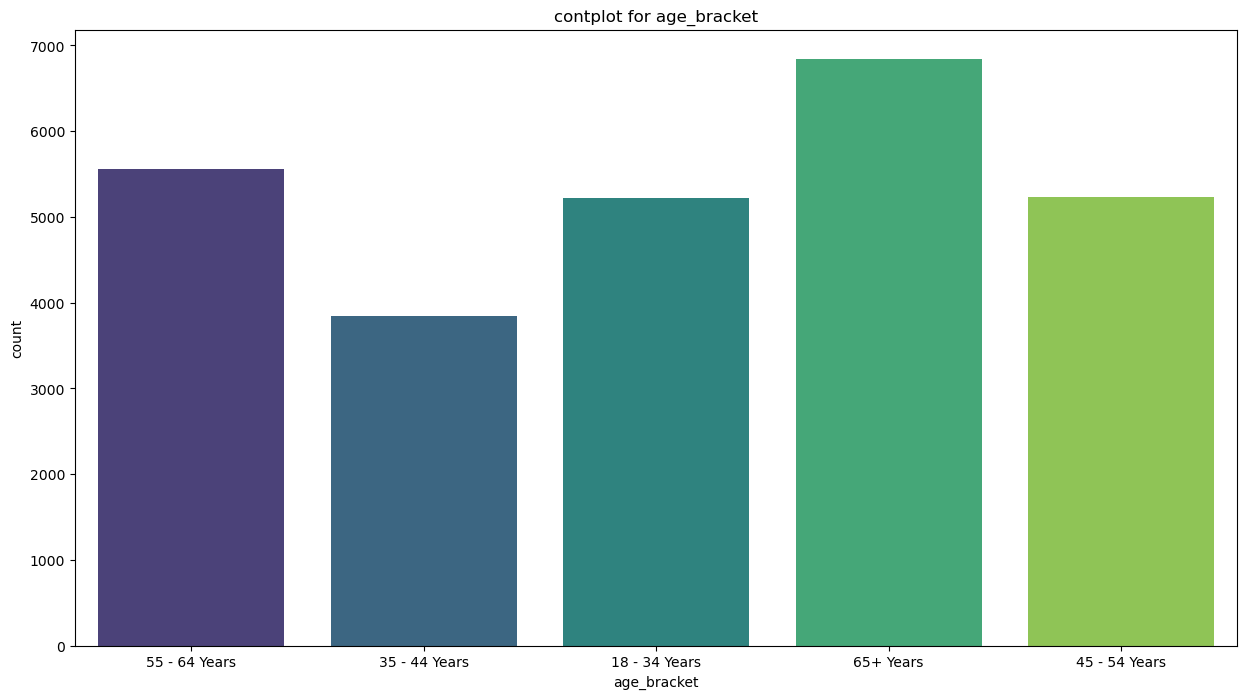

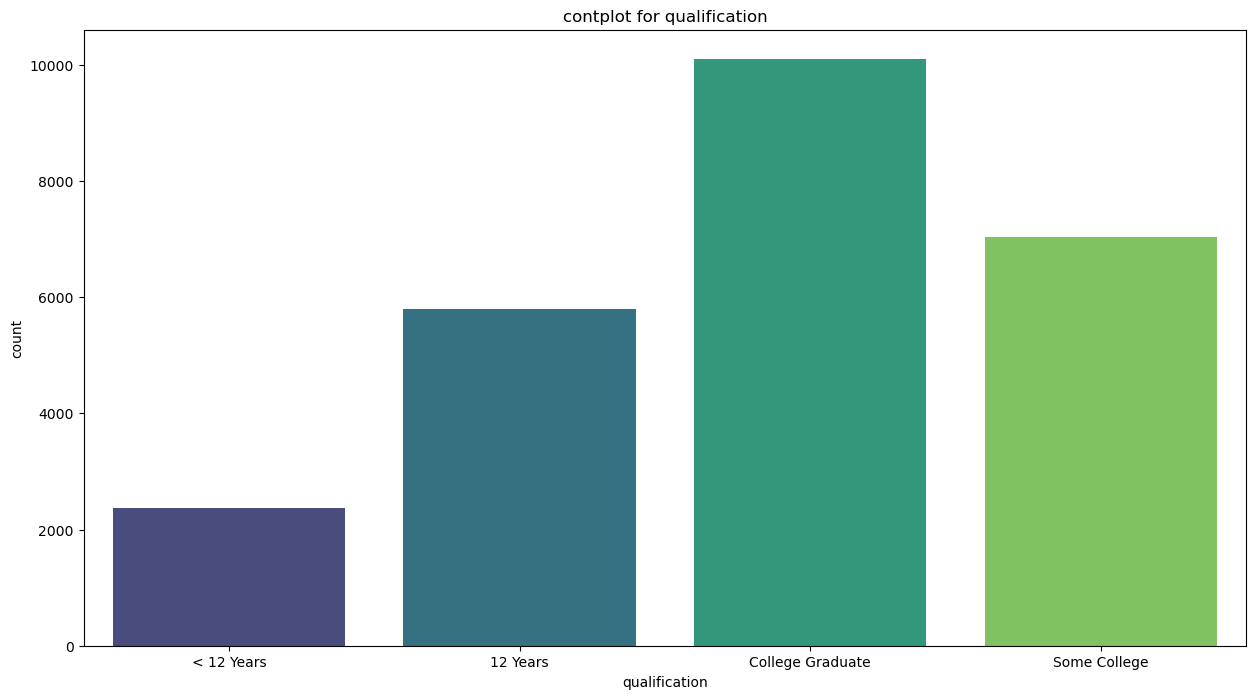

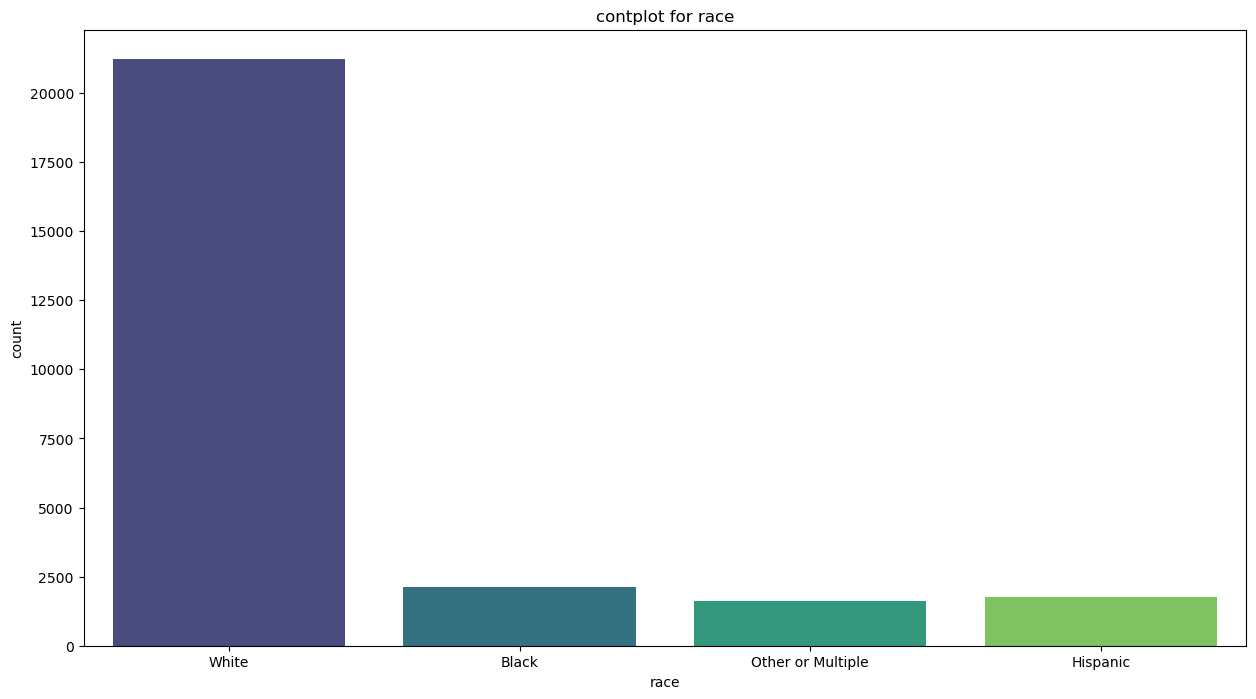

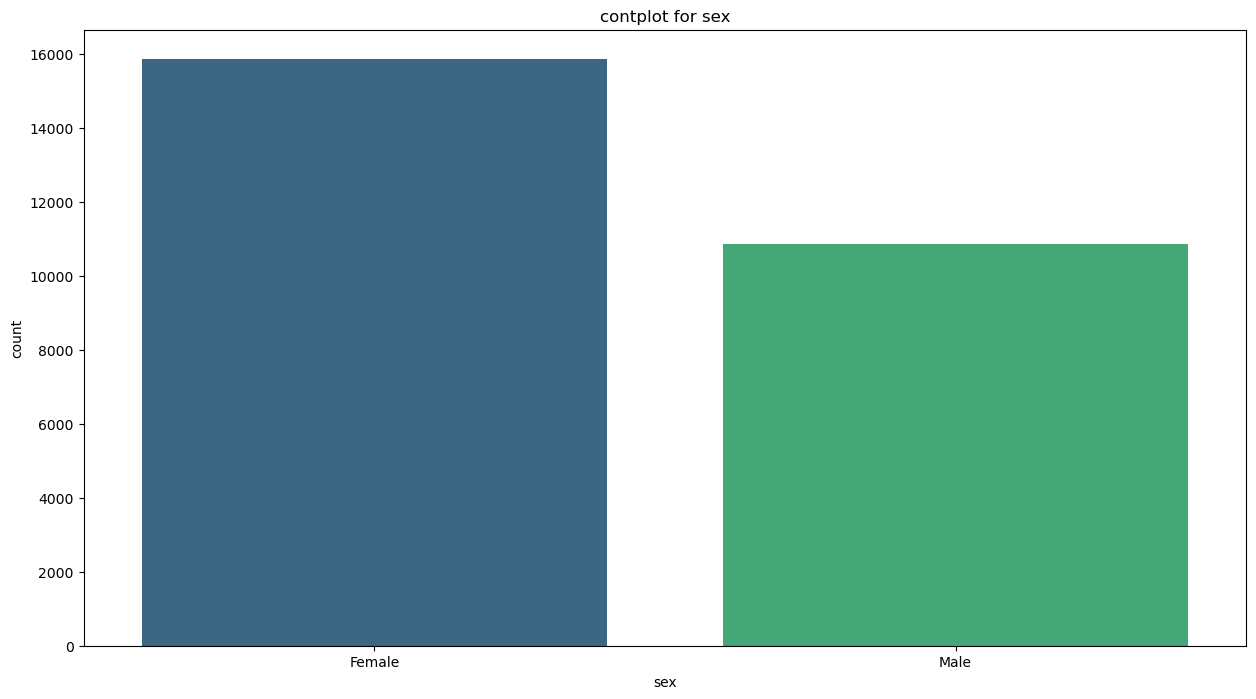

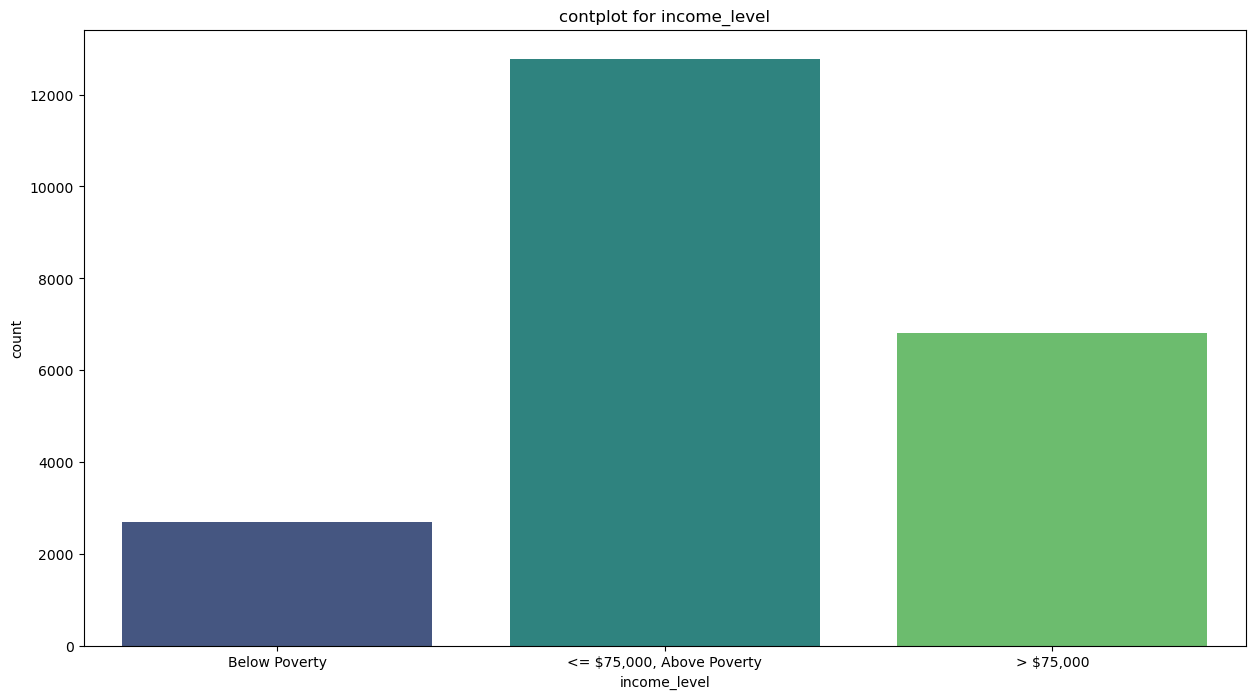

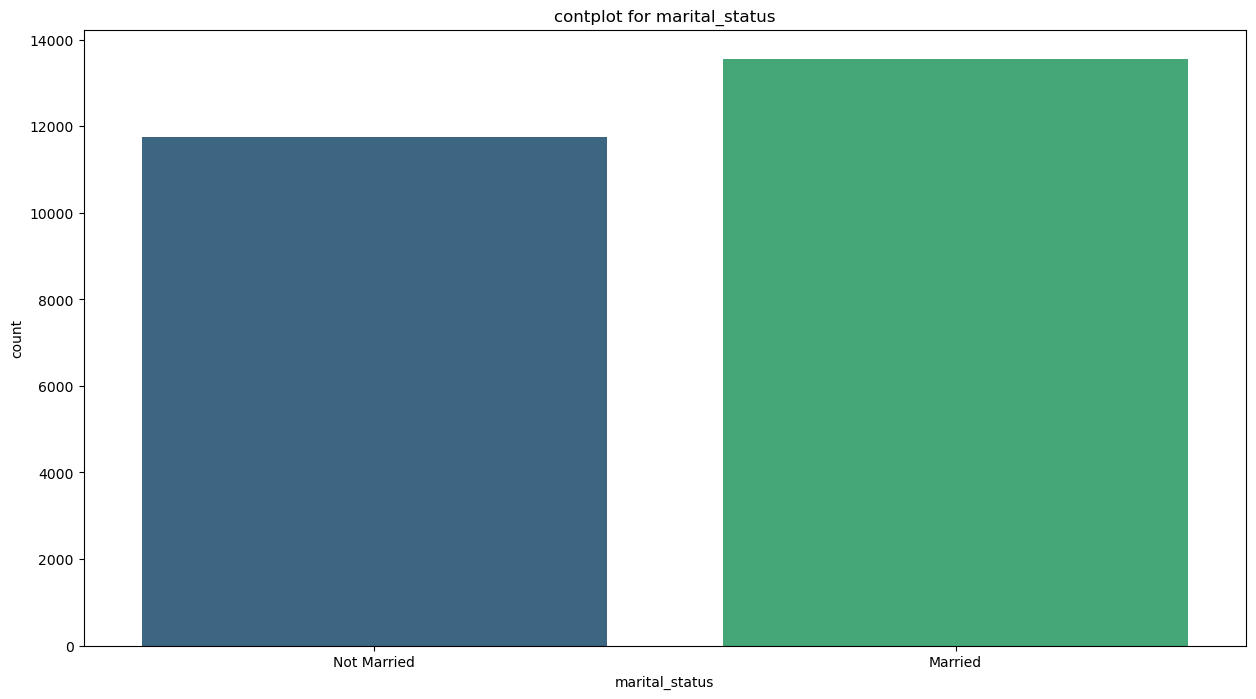

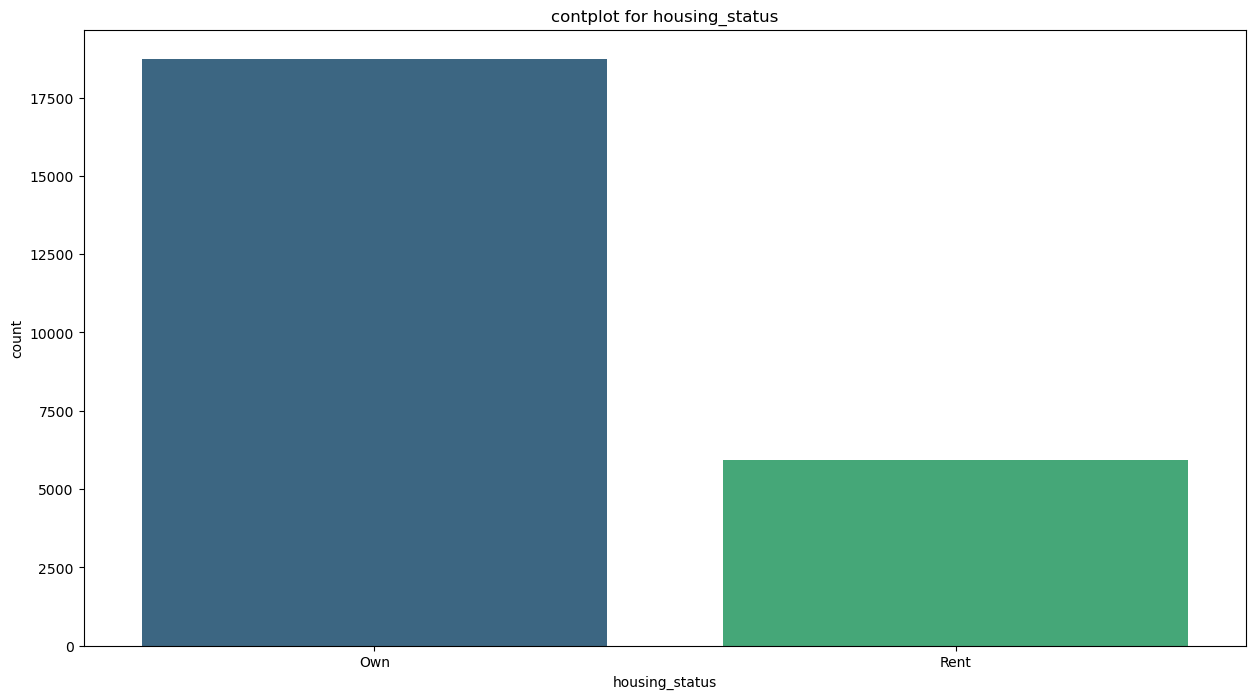

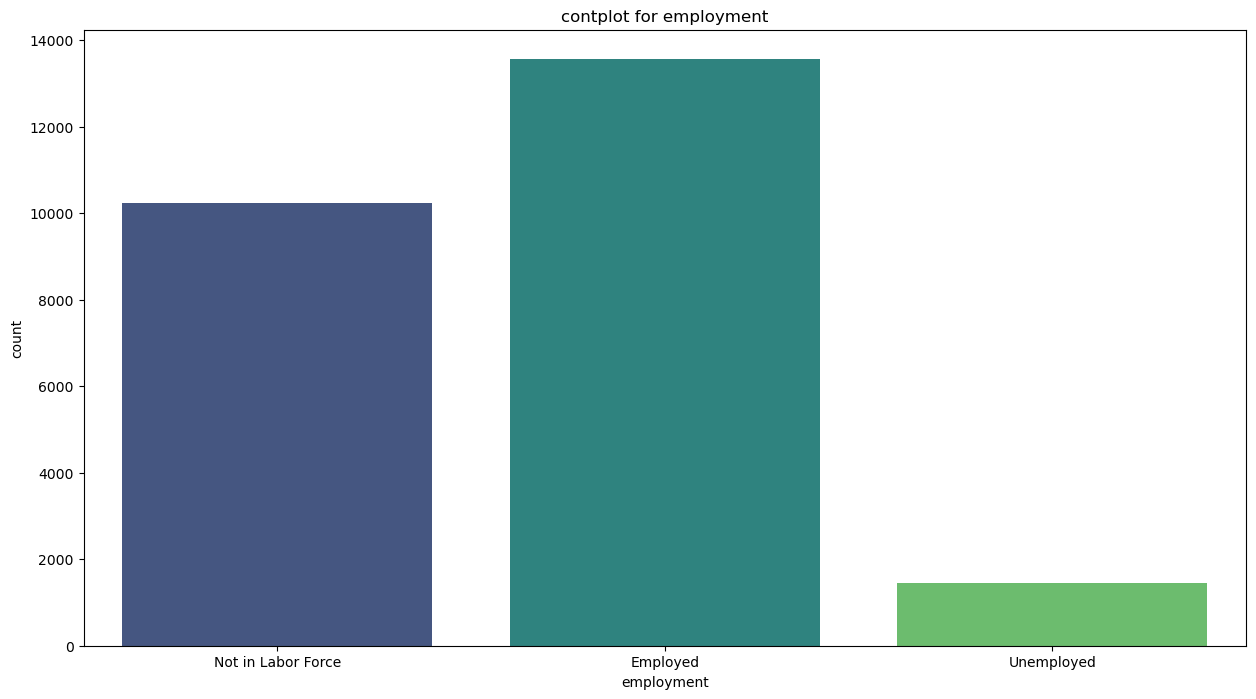

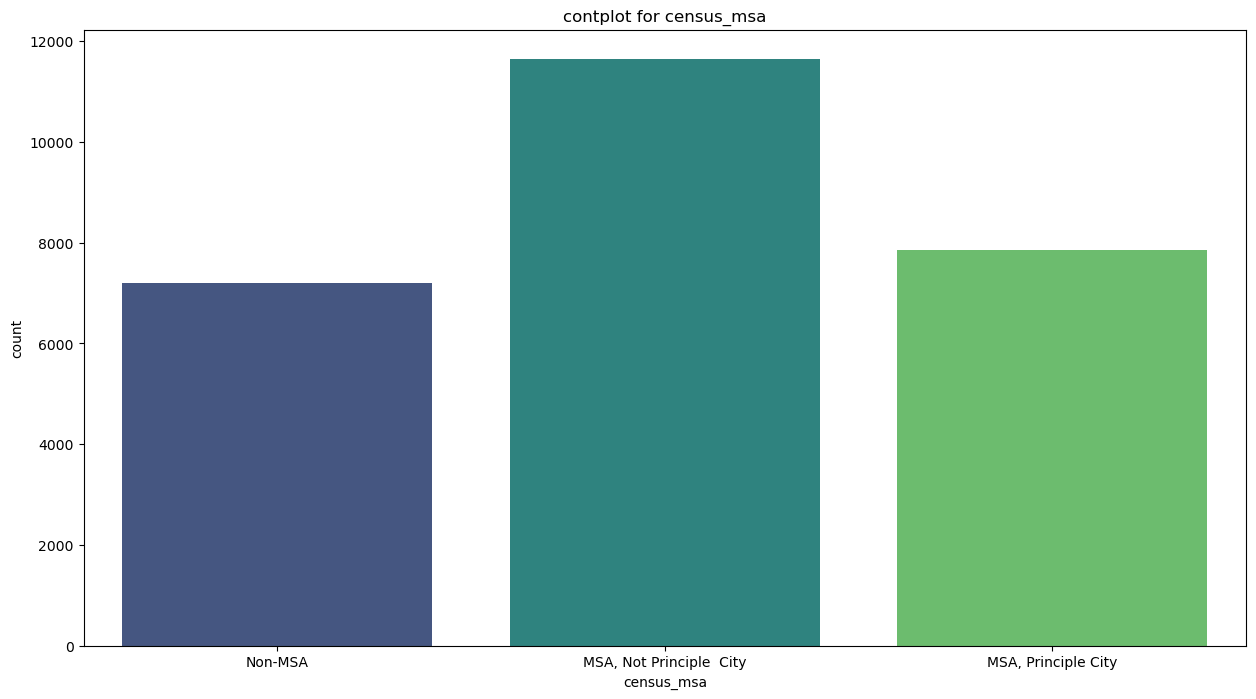

In [11]:
for i in categ_features.columns:
    plt.figure(figsize=(15,8))
    sns.countplot(categ_features[i],palette='viridis')
    plt.title(f'contplot for {i}')
    plt.show()

In [12]:
categ_features.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

# check the influence of categ variables on dependent variables

Text(0.5, 1.0, 'influence of age on h1n1_vaccine')

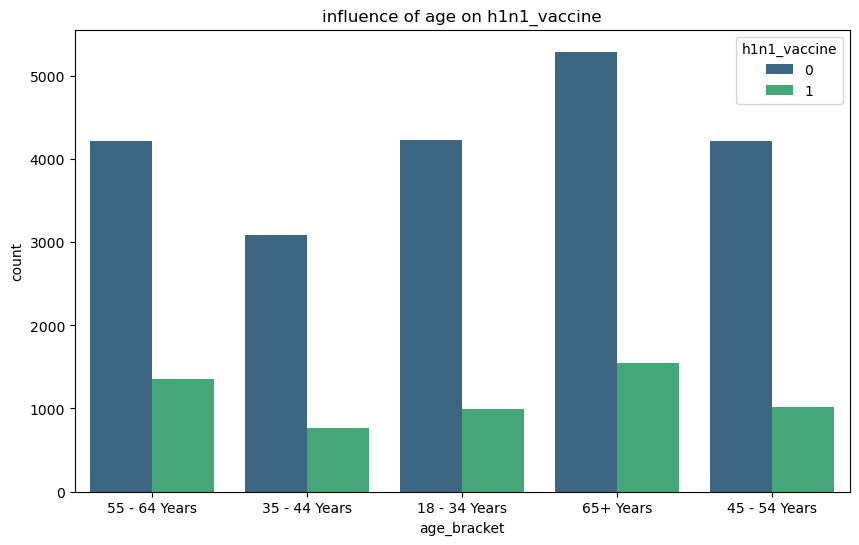

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_bracket',hue='h1n1_vaccine',data=data,palette='viridis')
plt.title("influence of age on h1n1_vaccine")

Text(0.5, 1.0, 'influence of qualification on h1n1_vaccine')

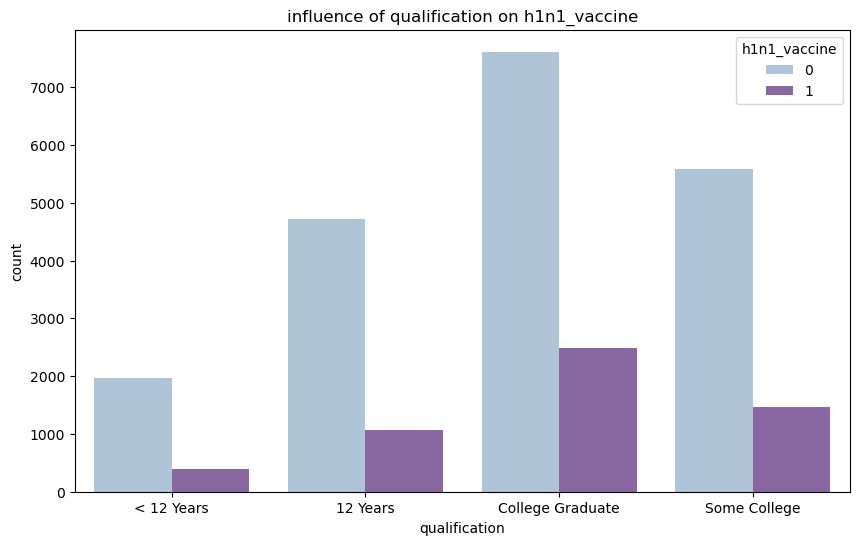

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='qualification',hue='h1n1_vaccine',data=data,palette='BuPu')
plt.title("influence of qualification on h1n1_vaccine")

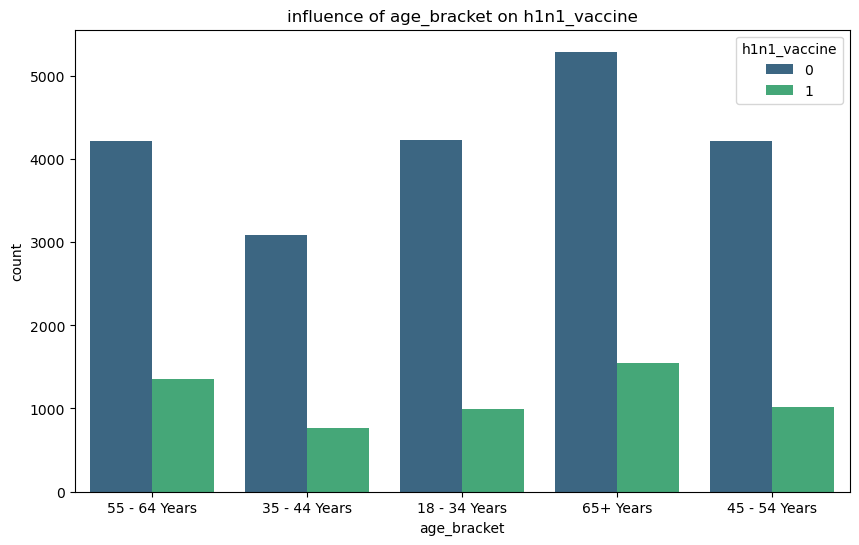

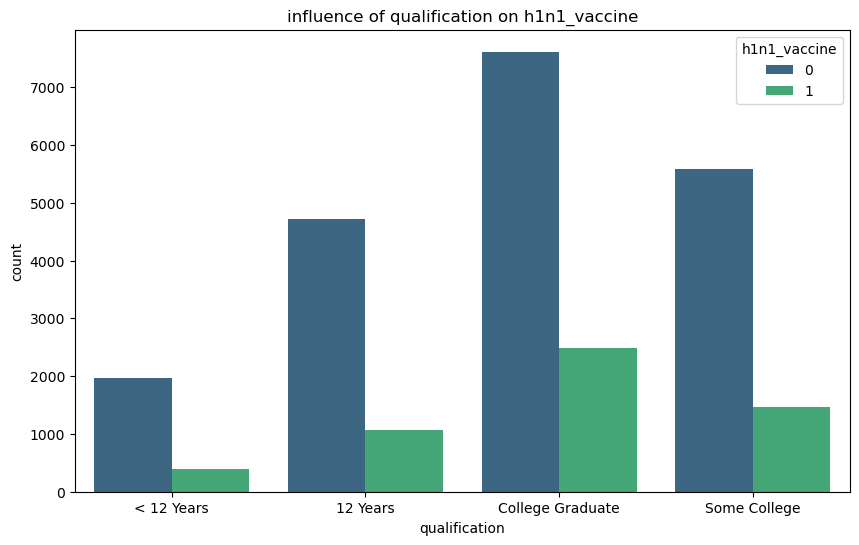

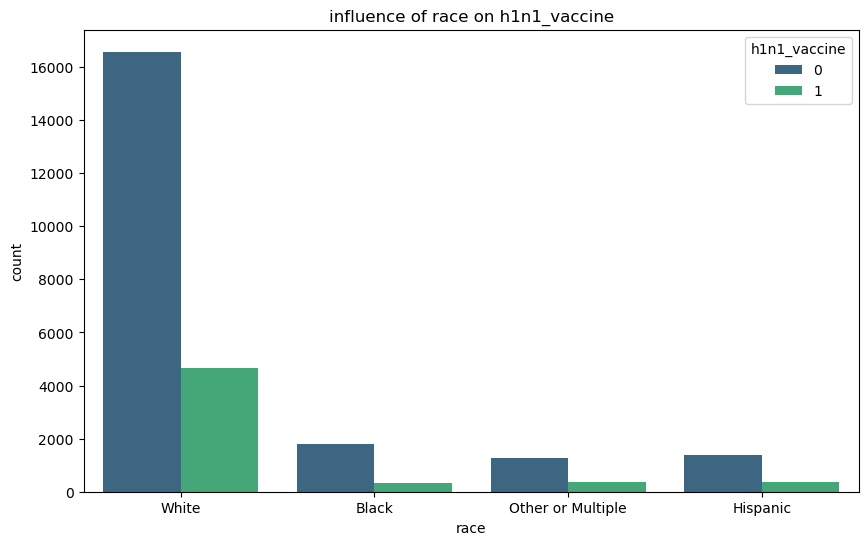

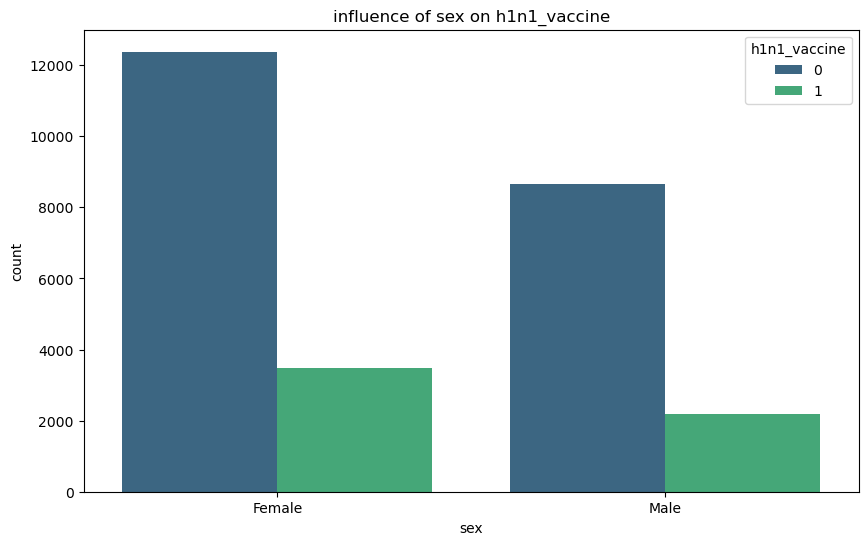

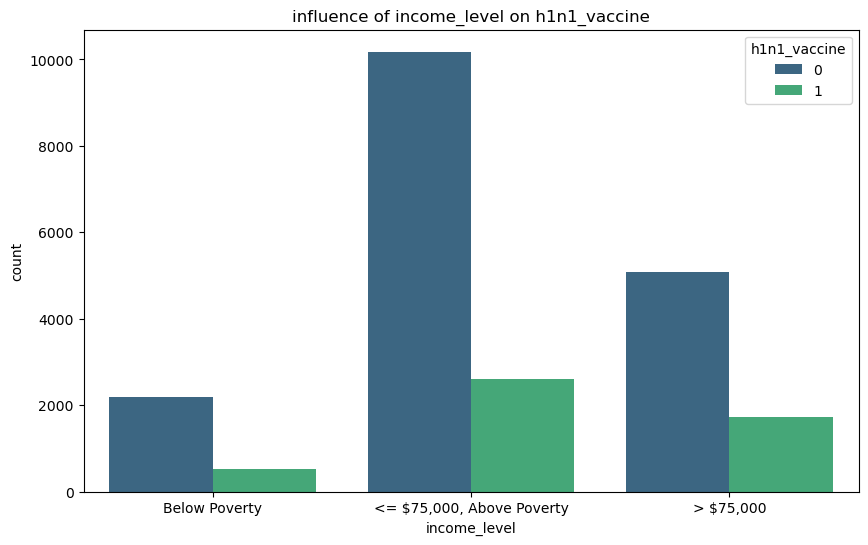

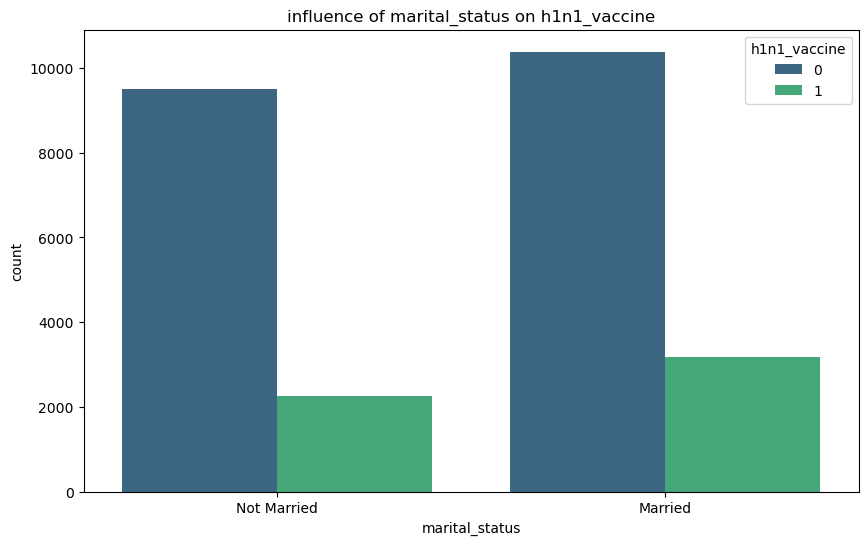

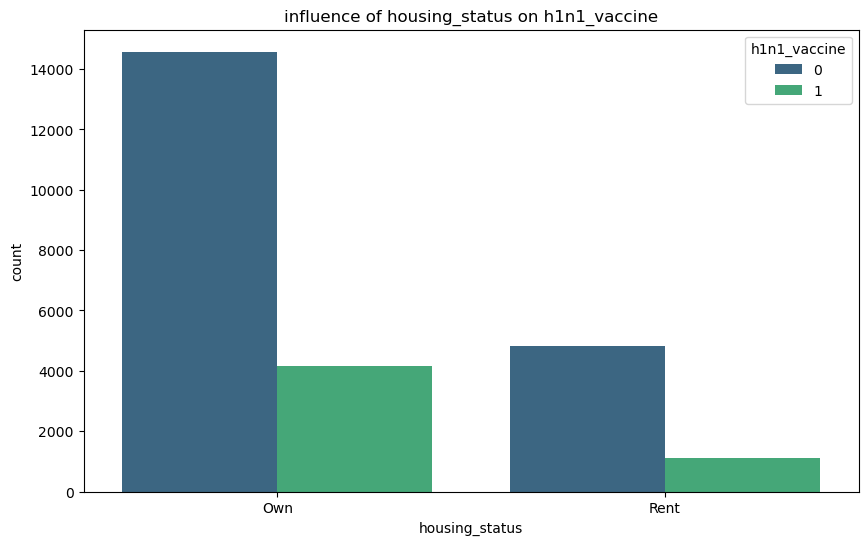

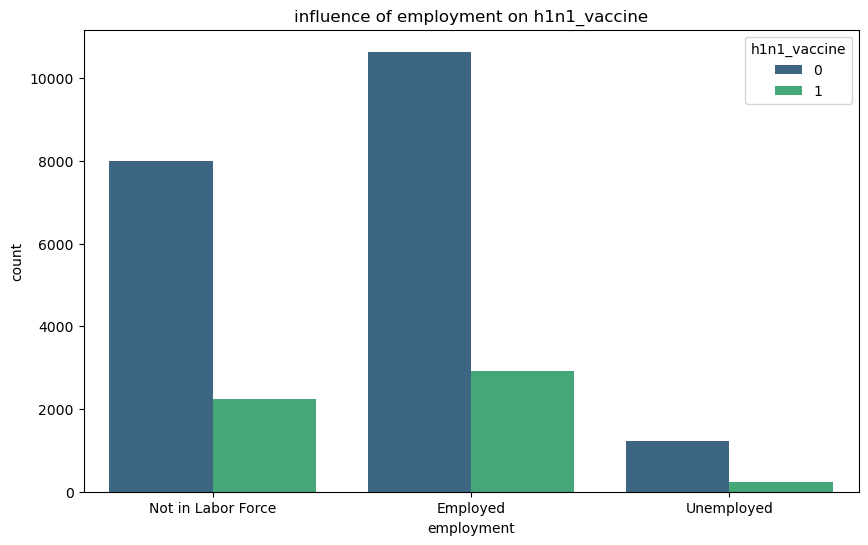

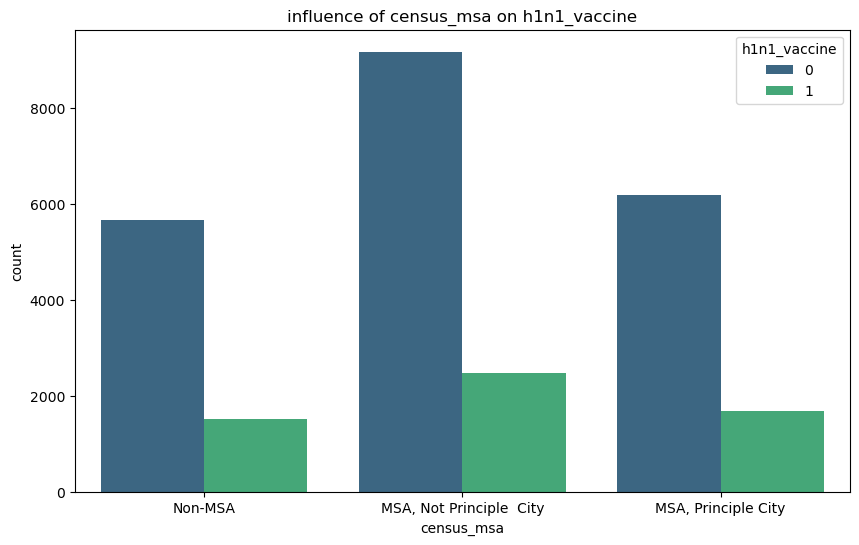

In [15]:
for i in categ_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=i,hue='h1n1_vaccine',data=data,palette='viridis')
    plt.title(f"influence of {i} on {'h1n1_vaccine'}")
    plt.xlabel(i)
    plt.ylabel('count')   

# Boxplot - visualize the distribution of numerical variable

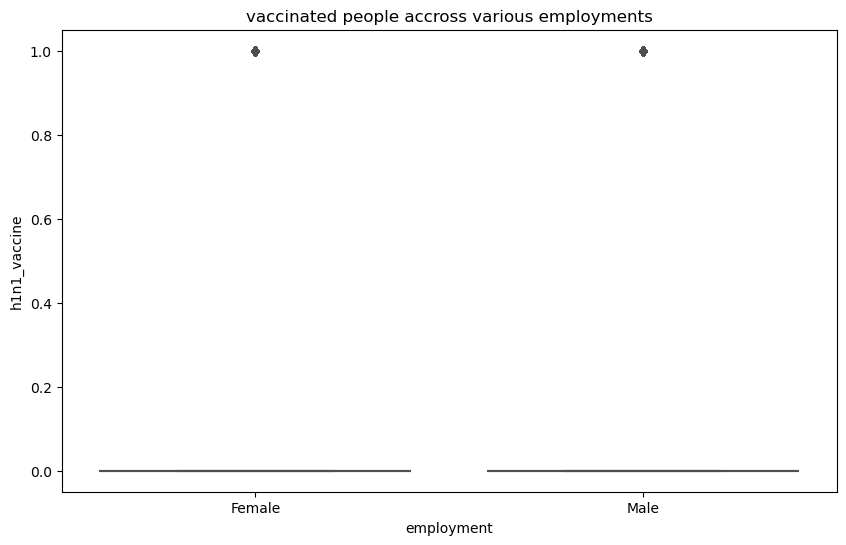

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sex',y='h1n1_vaccine',data=data,palette='BuPu')
plt.title("vaccinated people accross various employments")
plt.xlabel('employment')
plt.ylabel('h1n1_vaccine')
plt.show()

# Bivariate analysis

In [17]:
corr = data.corr()

<AxesSubplot:>

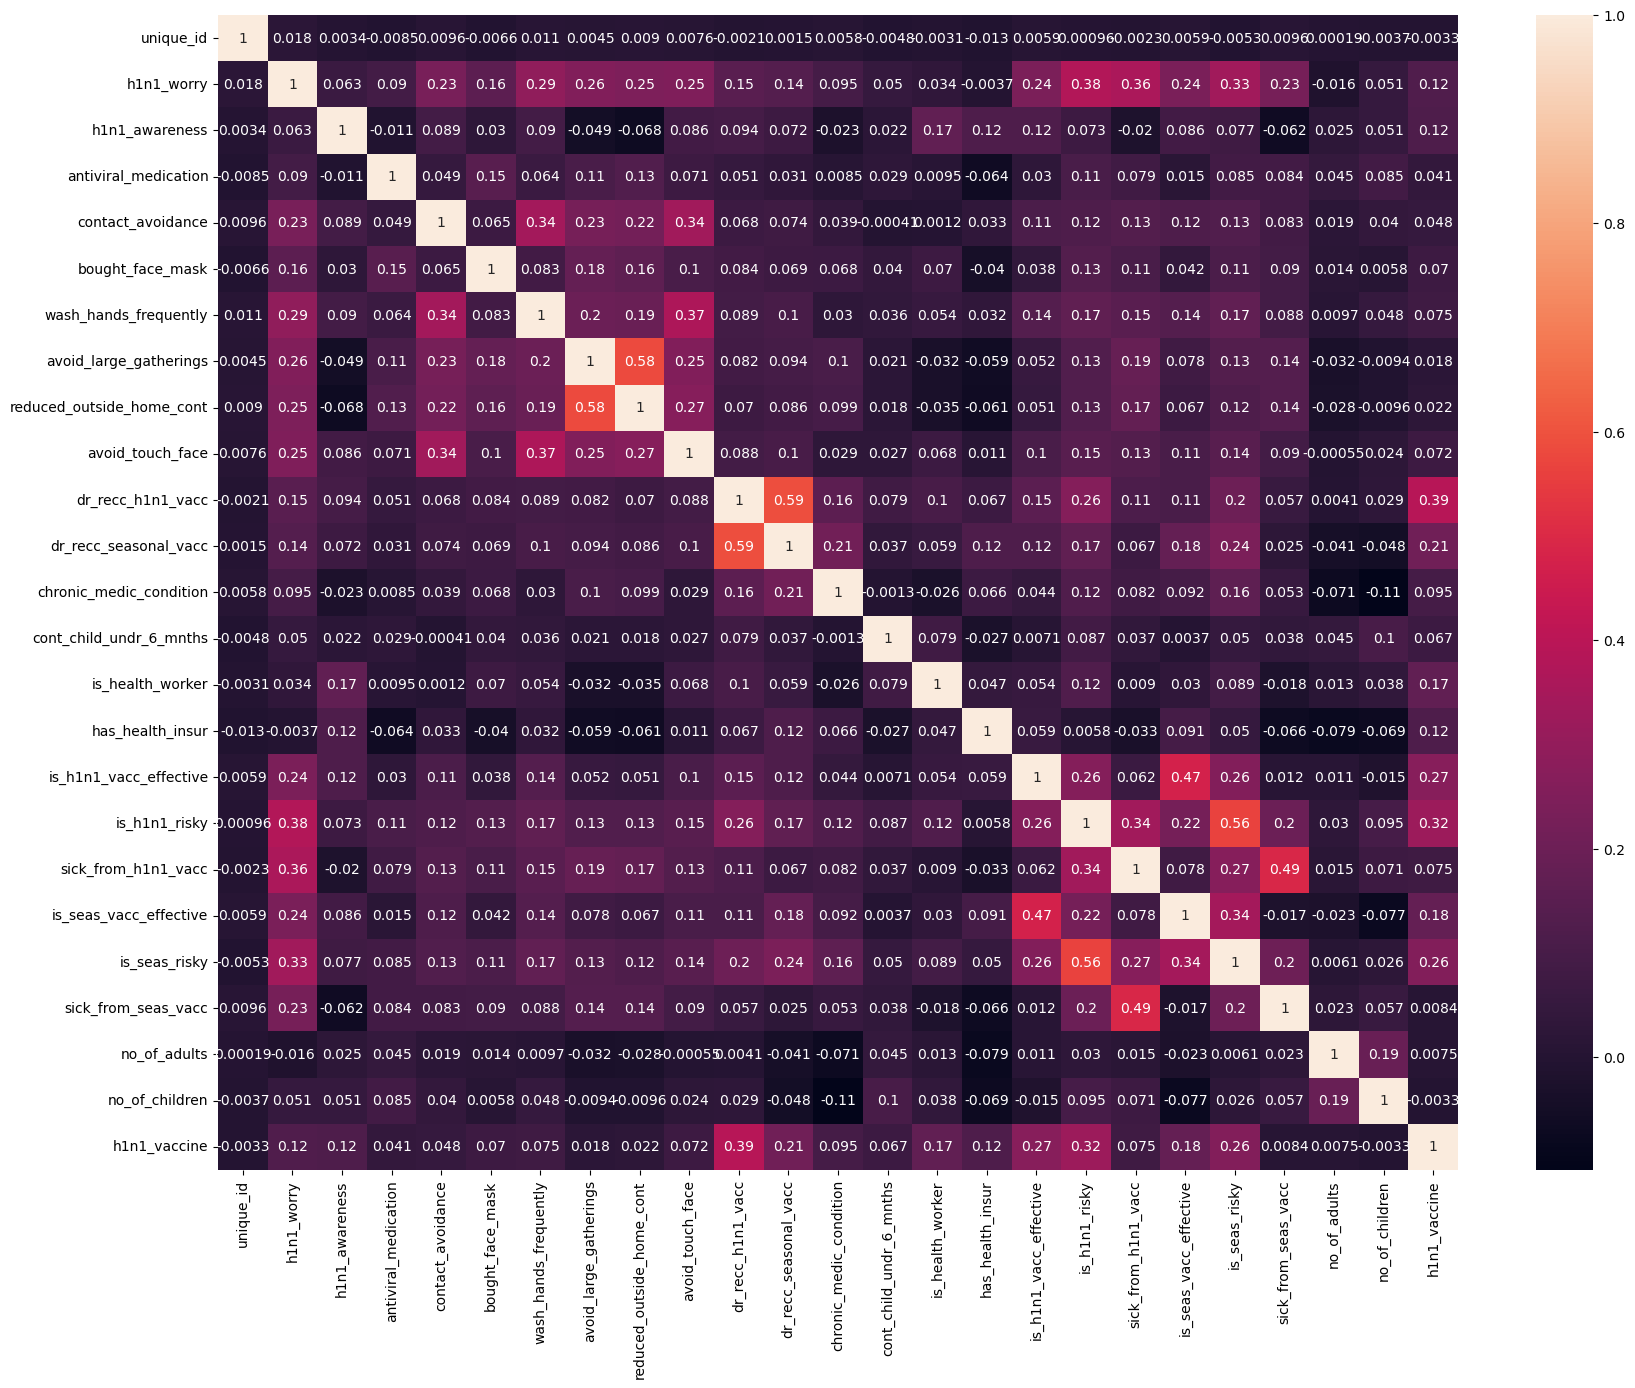

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

# Replace null values using median and mode

In [19]:
def replace_nullvalues(df):
    for i in data.columns[df.isnull().any()]:
        if df[i].dtype=='object':
            mode = df[i].mode().iloc[0]
            df[i].fillna(mode,inplace=True)
        elif df[i].dtype=='int' or 'float':
            median = data[i].median()
            df[i].fillna(median,inplace=True)
    return df       

In [20]:
replace_nullvalues(data)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

# check for outliers

In [22]:
numeric_columns = data.select_dtypes(include=['number']).columns
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)


In [23]:
len(outliers)

26707

In [24]:
for i in categ_features.columns:
    print(categ_features[i].value_counts())

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64
Female    15858
Male      10849
Name: sex, dtype: int64
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64
Married        13555
Not Married    11744
Name: marital_status, dtype: int64
Own     18736
Rent     5929
Name: housing_status, dtype: int64
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64


# Label Encodin for categ features

In [25]:
le = LabelEncoder()

for i in data.columns:
    if data[i].dtype=='object':
        data[i] = le.fit_transform(data[i])

In [26]:
x = data.drop('h1n1_vaccine',axis=1)
y = data['h1n1_vaccine']

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(18694, 33)
(8013, 33)
(18694,)
(8013,)


# Standardize the data

In [29]:
std = StandardScaler()

x_train_scaled = std.fit_transform(xtrain)
x_test_scaled = std.fit_transform(xtest)

# feature selection using RandomForest

In [30]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(x_train_scaled,ytrain)

RandomForestClassifier(random_state=0)

In [31]:
#feature_scores = pd.Series(clf.feature_importances_,index= x_train_scaled.columns).sort_values(ascending =False)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=xtrain.columns)
    
# Get the feature importances
feature_scores = pd.Series(clf.feature_importances_, index=x_train_scaled_df.columns).sort_values(ascending=False)
print(feature_scores)

unique_id                    0.107784
dr_recc_h1n1_vacc            0.101173
is_h1n1_risky                0.069472
is_h1n1_vacc_effective       0.064555
is_seas_risky                0.046504
age_bracket                  0.042388
sick_from_h1n1_vacc          0.036548
h1n1_worry                   0.035514
sick_from_seas_vacc          0.033611
qualification                0.033055
census_msa                   0.032364
is_seas_vacc_effective       0.030655
no_of_adults                 0.028869
h1n1_awareness               0.025964
no_of_children               0.025370
dr_recc_seasonal_vacc        0.023884
income_level                 0.023525
is_health_worker             0.022018
employment                   0.021794
race                         0.020539
sex                          0.019274
reduced_outside_home_cont    0.016669
avoid_large_gatherings       0.016642
chronic_medic_condition      0.016455
marital_status               0.016232
avoid_touch_face             0.015927
contact_avoi

# Building the LogisticRegression model

In [32]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(x_train_scaled,ytrain)

LogisticRegression(max_iter=1000)

In [33]:
y_train_pred = logreg.predict(x_train_scaled)
y_test_pred = logreg.predict(x_test_scaled)

# model evaluation using performance metrics

In [34]:
def model_eval(actual,pred):
    conf_mat = confusion_matrix(actual,pred)
    accuracy = accuracy_score(actual,pred)
    class_report = classification_report(actual,pred)
    print(conf_mat)
    print(class_report)
    print("accuracy score of the model is:",round(accuracy,2))

In [35]:
model_eval(ytrain,y_train_pred)

[[13944   770]
 [ 2302  1678]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14714
           1       0.69      0.42      0.52      3980

    accuracy                           0.84     18694
   macro avg       0.77      0.68      0.71     18694
weighted avg       0.82      0.84      0.82     18694

accuracy score of the model is: 0.84


In [36]:
model_eval(ytest,y_test_pred)

[[5998  321]
 [ 978  716]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6319
           1       0.69      0.42      0.52      1694

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.71      8013
weighted avg       0.82      0.84      0.82      8013

accuracy score of the model is: 0.84


In [37]:
dtree = DecisionTreeClassifier(max_depth=10,max_features=15)
dtree.fit(x_train_scaled,ytrain)

DecisionTreeClassifier(max_depth=10, max_features=15)

In [38]:
y_train_dtree_pred = dtree.predict(x_train_scaled)
y_test_dtree_pred = dtree.predict(x_test_scaled)

In [39]:
model_eval(ytrain,y_train_dtree_pred)

[[14225   489]
 [ 1952  2028]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     14714
           1       0.81      0.51      0.62      3980

    accuracy                           0.87     18694
   macro avg       0.84      0.74      0.77     18694
weighted avg       0.86      0.87      0.86     18694

accuracy score of the model is: 0.87


In [40]:
model_eval(ytest,y_test_dtree_pred)

[[5908  411]
 [1032  662]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6319
           1       0.62      0.39      0.48      1694

    accuracy                           0.82      8013
   macro avg       0.73      0.66      0.68      8013
weighted avg       0.80      0.82      0.80      8013

accuracy score of the model is: 0.82


In [41]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train_scaled,ytrain)

RandomForestClassifier(n_estimators=150)

In [42]:
y_train_clf_pred = clf.predict(x_train_scaled)
y_test_clf_pred = clf.predict(x_test_scaled)

In [43]:
model_eval(ytrain,y_train_clf_pred)

[[14714     0]
 [    0  3980]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14714
           1       1.00      1.00      1.00      3980

    accuracy                           1.00     18694
   macro avg       1.00      1.00      1.00     18694
weighted avg       1.00      1.00      1.00     18694

accuracy score of the model is: 1.0


In [44]:
model_eval(ytest,y_test_clf_pred)

[[6014  305]
 [1018  676]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6319
           1       0.69      0.40      0.51      1694

    accuracy                           0.83      8013
   macro avg       0.77      0.68      0.70      8013
weighted avg       0.82      0.83      0.82      8013

accuracy score of the model is: 0.83


In [45]:
ada = AdaBoostClassifier()
ada.fit(x_train_scaled,ytrain)

AdaBoostClassifier()

In [46]:
y_train_ada_pred = ada.predict(x_train_scaled)
y_test_ada_pred = ada.predict(x_test_scaled)

In [47]:
model_eval(ytrain,y_train_ada_pred)

[[13917   797]
 [ 2303  1677]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14714
           1       0.68      0.42      0.52      3980

    accuracy                           0.83     18694
   macro avg       0.77      0.68      0.71     18694
weighted avg       0.82      0.83      0.82     18694

accuracy score of the model is: 0.83


In [48]:
model_eval(ytest,y_test_ada_pred)

[[6000  319]
 [ 990  704]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6319
           1       0.69      0.42      0.52      1694

    accuracy                           0.84      8013
   macro avg       0.77      0.68      0.71      8013
weighted avg       0.82      0.84      0.82      8013

accuracy score of the model is: 0.84
